# Sommaire :

**Partie 1 : <a href="#C1">Importation et découverte des différents jeux de données**</a>
- <a href="#C2">Récapitulatif concernant fichier 'EdStatsCountry.csv'</a>
- <a href="#C3">Récapitulatif concernant fichier 'EdStatsSeries.csv'</a>
- <a href="#C4">Récapitulatif concernant fichier 'EdStatsCountry-Series.csv'</a>
- <a href="#C5">Récapitulatif concernant fichier 'EdStatsFootNote.csv'</a>
- <a href="#C6">Récapitulatif concernant fichier 'EdStatsData.csv'</a>

**Partie 2 : <a href="#C7">Choix des indicateurs à explorer pour l'analyse**</a>
- <a href="#C8">1. Indicateurs permettant d'évaluer le potentiel marché d'un pays</a>
- <a href="#C9">2. Indicateurs évaluant le nombre d'utilisateurs internet d'un pays ainsi que la possession d'un ordinateur personnel</a>
- <a href="#C10">3. Potentiel économique d'un pays</a>
- <a href="#C11">4. Plus forte nécessité ou non d'avoir un service de formation disponible</a>
- <a href="#C12">5. Indication de l'évolution du marché potentiel sur les prochaines années</a>

**Partie 3 : <a href="#C13">Création du jeu de données final pour l'analyse**</a>

**Partie 4 : <a href="#C14">Analyse des différentes variables**</a>

**Partie 5 : <a href="#C15">Mise en place d'un système de scores pour classer les pays**</a>

**Partie 6 : <a href="#C16">Analyse de l'évolution potentielle des marchés**</a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <a name="C1">Partie 1 : Importation et découverte des différents jeux de données

In [3]:
df_country = pd.read_csv('EdStatsCountry.csv', sep=',')

In [4]:
df_country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df_country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [7]:
df_country.shape

(241, 32)

In [8]:
df_country['Short Name'].unique().size

241

In [9]:
df_country['Short Name'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde',
       'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
       'East Asia & Pacific (developing only)',
       'East Asia & Pacific (all income levels)',
       'Europe & Central Asia (developing only)',


In [10]:
df_country[df_country['Short Name']=='East Asia & Pacific (developing only)']

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_country[df_country['Region'].isna()]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,EAS,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),Z4,NaN,East Asia and Pacific regional aggregate (incl...,NaN,NaN,Z4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,ECA,Europe & Central Asia (developing only),Europe & Central Asia,Europe & Central Asia (developing only),7E,NaN,Europe and Central Asia regional aggregate (do...,NaN,NaN,7E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,ECS,Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Z7,NaN,Europe and Central Asia regional aggregate (in...,NaN,NaN,Z7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,EMU,Euro area,Euro area,Euro area,XC,NaN,Euro area aggregate.,NaN,NaN,XC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,EUU,European Union,European Union,European Union,EU,NaN,European Union aggregate.,NaN,NaN,EU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,GIB,Gibraltar,Gibraltar,Gibraltar,GI,Gibraltar pound,NaN,NaN,NaN,GI,NaN,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,HIC,High income,High income,High income,XD,NaN,High income group aggregate. High-income econo...,NaN,NaN,XD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),XE,NaN,Heavily indebted poor countries aggregate.,NaN,NaN,XE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_country[df_country['Region'].isna()].shape

(27, 32)

In [13]:
df_country[df_country['Income Group'].isna()]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,EAS,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),Z4,NaN,East Asia and Pacific regional aggregate (incl...,NaN,NaN,Z4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,ECA,Europe & Central Asia (developing only),Europe & Central Asia,Europe & Central Asia (developing only),7E,NaN,Europe and Central Asia regional aggregate (do...,NaN,NaN,7E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,ECS,Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Z7,NaN,Europe and Central Asia regional aggregate (in...,NaN,NaN,Z7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,EMU,Euro area,Euro area,Euro area,XC,NaN,Euro area aggregate.,NaN,NaN,XC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,EUU,European Union,European Union,European Union,EU,NaN,European Union aggregate.,NaN,NaN,EU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,GIB,Gibraltar,Gibraltar,Gibraltar,GI,Gibraltar pound,NaN,NaN,NaN,GI,NaN,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,HIC,High income,High income,High income,XD,NaN,High income group aggregate. High-income econo...,NaN,NaN,XD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),XE,NaN,Heavily indebted poor countries aggregate.,NaN,NaN,XE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_country[df_country['Income Group'].isna()].shape

(27, 32)

In [15]:
df_country[(df_country['Income Group'].isna())&(df_country['Region'].isna())]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,EAS,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),Z4,NaN,East Asia and Pacific regional aggregate (incl...,NaN,NaN,Z4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,ECA,Europe & Central Asia (developing only),Europe & Central Asia,Europe & Central Asia (developing only),7E,NaN,Europe and Central Asia regional aggregate (do...,NaN,NaN,7E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,ECS,Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Z7,NaN,Europe and Central Asia regional aggregate (in...,NaN,NaN,Z7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,EMU,Euro area,Euro area,Euro area,XC,NaN,Euro area aggregate.,NaN,NaN,XC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,EUU,European Union,European Union,European Union,EU,NaN,European Union aggregate.,NaN,NaN,EU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,GIB,Gibraltar,Gibraltar,Gibraltar,GI,Gibraltar pound,NaN,NaN,NaN,GI,NaN,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,HIC,High income,High income,High income,XD,NaN,High income group aggregate. High-income econo...,NaN,NaN,XD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),XE,NaN,Heavily indebted poor countries aggregate.,NaN,NaN,XE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_country[(df_country['Income Group'].isna())&(df_country['Region'].isna())].shape

(27, 32)

In [17]:
df_country[(df_country['Income Group'].isna())&(df_country['Region'].isna())]['Short Name'].values

array(['Arab World', 'East Asia & Pacific (developing only)',
       'East Asia & Pacific (all income levels)',
       'Europe & Central Asia (developing only)',
       'Europe & Central Asia (all income levels)', 'Euro area',
       'European Union', 'Gibraltar', 'High income',
       'Heavily indebted poor countries (HIPC)',
       'Latin America & Caribbean (developing only)',
       'Latin America & Caribbean (all income levels)',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'Middle East & North Africa (all income levels)', 'Middle income',
       'Middle East & North Africa (developing only)', 'North America',
       'Nauru', 'OECD members', 'South Asia',
       'Sub-Saharan Africa (developing only)',
       'Sub-Saharan Africa (all income levels)', 'Upper middle income',
       'World'], dtype=object)

In [18]:
df_country[(~df_country['Income Group'].isna())&(~df_country['Region'].isna())]['Short Name'].sort_values().values

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', "Côte d'Ivoire",
       "Dem. People's Rep. Korea", 'Dem. Rep. Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Fiji', 'Finland', 'France',
       'French Polynesia

In [19]:
df_country[(~df_country['Income Group'].isna())&(~df_country['Region'].isna())]['Short Name'].size

214

In [20]:
(df_country.isna().sum()/df_country.shape[0]).sort_values(ascending=True)

Country Code                                         0.000000
Short Name                                           0.000000
Table Name                                           0.000000
Long Name                                            0.000000
WB-2 code                                            0.004149
2-alpha code                                         0.012448
System of National Accounts                          0.107884
Currency Unit                                        0.107884
Region                                               0.112033
Income Group                                         0.112033
Latest population census                             0.116183
National accounts base year                          0.149378
System of trade                                      0.170124
SNA price valuation                                  0.182573
Latest trade data                                    0.232365
IMF data dissemination standard                      0.248963
Balance 

<AxesSubplot:>

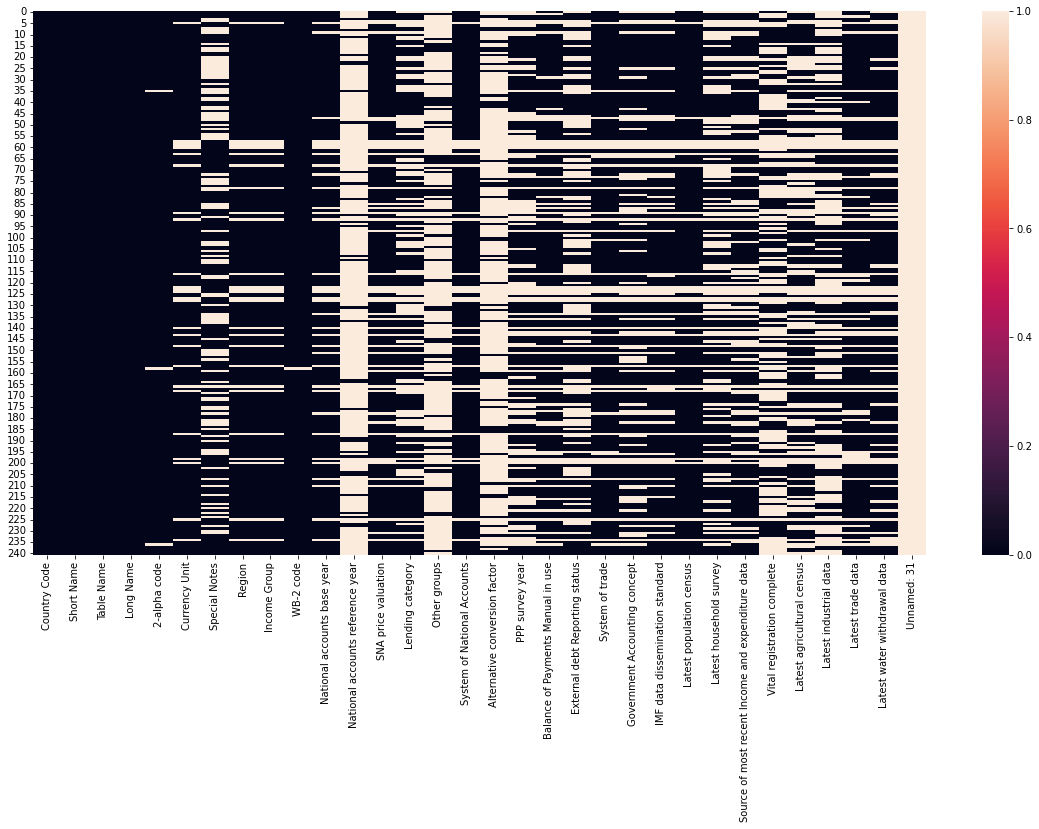

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df_country.isna())

### <a name="C2">Récapitulatif concernant fichier 'EdStatsCountry.csv' :  
241 lignes et 32 colonnes --> donne des indications sur les pays comme la région du pays, son niveau de revenu, sa monnaie mais aussi des indications sur l'année de derniers relevés économiques ou démographiques par exemple.  
  
Colonnes qui pourraient être intéressantes pour la suite :
- Region (pour faire l'analyse des régions intéressantes en plus de celle des pays)
- Income Group (pour pouvoir filtrer sur les pays appartenant uniquement à une catégorie de revenu minimum)

A noter qu'il n'y a pas que des pays qui sont listés dans ce fichier, on retrouve aussi des noms de groupes de pays dans la colonne 'Short Name' comme par exemple 'Arab World', 'East Asia & Pacific (developing only)' etc. Les colonnes 'Region' et 'Income Group' sont en NaN lorqu'il y a un groupe de pays indiqué dans la colonne 'Short Name'. Gibraltar et Nauru n'ont également pas de données renseignés pour 'Region' et 'Income Group'.  
Outre les pays, il y a également des territoires d'outre-mer de certains pays qui sont listés comme 'St. Martin (French part)' ou 'French Polynesia' par exemple pour la France.  
On dénombre donc au total 216 pays/territoires d'outre-mer et 25 groupes de pays sur les 241 lignes présentes dans le fichier.

In [22]:
df_series = pd.read_csv('EdStatsSeries.csv', sep=',')

In [23]:
df_series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_series.shape

(3665, 21)

In [25]:
df_series['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

In [26]:
df_series['Topic'].unique().size

37

In [27]:
df_series['Indicator Name'].unique()

array(['Barro-Lee: Percentage of female population age 15-19 with no education',
       'Barro-Lee: Percentage of population age 15-19 with no education',
       'Barro-Lee: Percentage of female population age 15+ with no education',
       ..., 'Government expenditure per tertiary student (constant US$)',
       'Government expenditure in secondary institutions education as % of GDP (%)',
       'Government expenditure in tertiary institutions as % of GDP (%)'],
      dtype=object)

In [28]:
df_series['Indicator Name'].unique().size

3665

In [29]:
(df_series.isna().sum()/df_series.shape[0]).sort_values(ascending=True)

Series Code                            0.000000
Topic                                  0.000000
Indicator Name                         0.000000
Long definition                        0.000000
Source                                 0.000000
Short definition                       0.411733
Other notes                            0.849386
Base Period                            0.914325
Related source links                   0.941337
Periodicity                            0.972988
Aggregation method                     0.987176
Statistical concept and methodology    0.993724
Limitations and exceptions             0.996180
General comments                       0.996180
Development relevance                  0.999181
Notes from original source             1.000000
License Type                           1.000000
Unit of measure                        1.000000
Other web links                        1.000000
Related indicators                     1.000000
Unnamed: 20                            1

<AxesSubplot:>

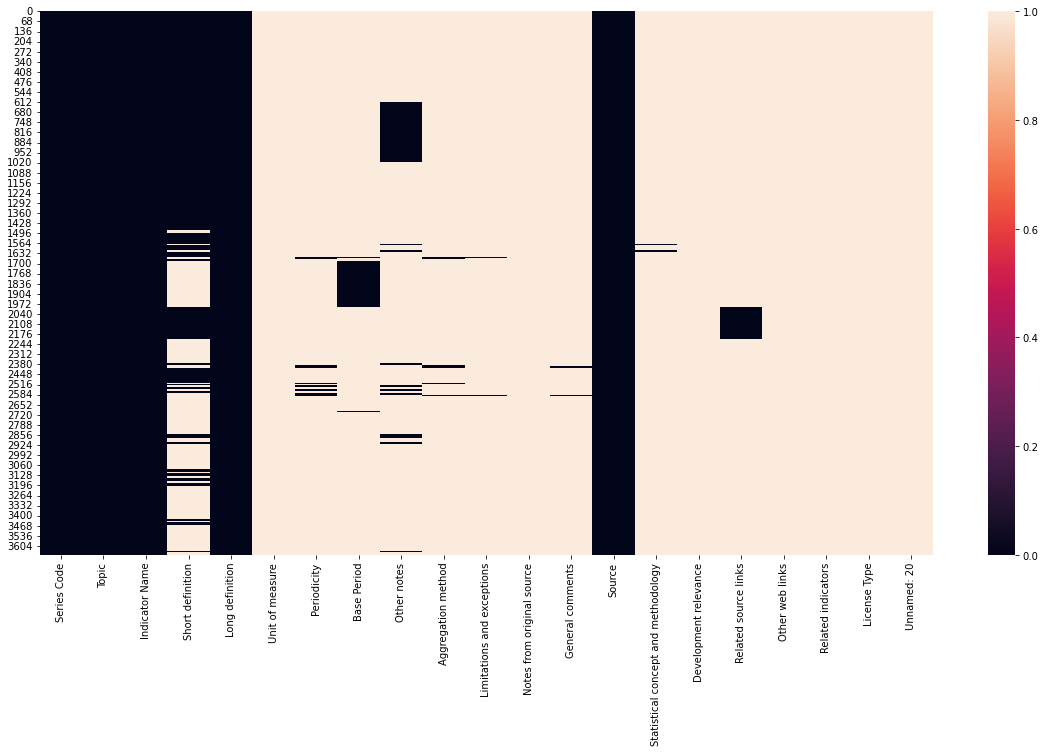

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(df_series.isna())

### <a name="C3">Récapitulatif concernant fichier 'EdStatsSeries.csv' :</a>  
3 665 lignes et 21 colonnes --> liste les différents indicateurs collectés par la banque mondiale sur le sujet de l'éducation. La plupart des colonnes ont plus de 84% de valeurs manquantes sauf pour 'Series Code', 'Topic', Indicator Name', 'Long definition', 'Source' et 'Short definition'.  
Il y a 3 665 indicateurs collectés au total répartis en 37 'Topic' ('Attainment', 'Education Equality', 'Infrastructure: Communications' etc).

In [31]:
df_countrySeries = pd.read_csv('EdStatsCountry-Series.csv', sep=',')

In [32]:
df_countrySeries.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [33]:
df_countrySeries.shape

(613, 4)

In [34]:
df_countrySeries['DESCRIPTION'].unique()

array(['Data sources : United Nations World Population Prospects',
       'Data sources: United Nations World Population Prospects',
       'Estimates are based on regression.',
       'Data sources : Institute of Statistics, Eurostat',
       'Data sources : Australian Bureau of Statistics',
       'Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands. ',
       'Data sources: Australian Bureau of Statistics',
       'Data sources : Eurostat',
       'Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources: Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources : National Statistical Committee of the Republic of Belarus',
       'Data sources: National Statistical Committee of the Republic of Belarus',
       'Data sources : Bermuda Government Department of Statistics',
       'Data sources: Bermuda Government Departme

In [35]:
df_countrySeries.isna().sum()/df_countrySeries.shape[0]

CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
Unnamed: 3     1.0
dtype: float64

In [36]:
df_countrySeries['CountryCode'].unique().size

211

In [37]:
df_countrySeries['SeriesCode'].unique().size

21

In [38]:
df_series[df_series['Series Code'].isin(df_countrySeries['SeriesCode'].unique())]['Indicator Name']

1660                   GDP, PPP (current international $)
1661             GDP, PPP (constant 2011 international $)
1662                         GDP per capita (current US$)
1663                   GDP per capita (constant 2010 US$)
1664        GDP per capita, PPP (current international $)
1665    GDP per capita, PPP (constant 2011 internation...
1667                   GNI, PPP (current international $)
1668           GNI per capita, Atlas method (current US$)
1669        GNI per capita, PPP (current international $)
2401                         Population ages 0-14, female
2402                           Population ages 0-14, male
2403                          Population ages 0-14, total
2404                    Population ages 0-14 (% of total)
2507                        Population ages 15-64, female
2508                          Population ages 15-64, male
2509                         Population ages 15-64, total
2510                   Population ages 15-64 (% of total)
2589          

### <a name="C4">Récapitulatif concernant fichier 'EdStatsCountry-Series.csv' : </a> 
613 lignes et 4 colonnes --> Renseigne la source des données pour 211 'CountryCode' de 21 indicateurs tel que le GDP, le GNI ou la population totale/homme/femme par exemple.

In [39]:
df_footNote = pd.read_csv('EdStatsFootNote.csv', sep=',')

In [40]:
df_footNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [41]:
df_footNote.shape

(643638, 5)

In [42]:
df_footNote['CountryCode'].unique().size

239

In [43]:
df_footNote['SeriesCode'].unique().size

1558

In [44]:
df_footNote['Year'].unique().size

56

In [45]:
df_footNote['DESCRIPTION'].unique()

array(['Country estimation.', 'UIS Estimation',
       'UNESCO Institute for Statistics (UIS) estimate', ...,
       'Uncertainty bound is 91.6 - 109.3',
       'Uncertainty bound is 54.3 - 76',
       'Uncertainty bound is 48.3 - 73.3'], dtype=object)

### <a name="C5">Récapitulatif concernant fichier 'EdStatsFootNote.csv' :  </a>
643 638 lignes et 5 colonnes --> Donne des informations supplémentaires sur la source ou la valeur des données de certains pays, pour certains indicateurs et certaines années.

In [46]:
df_data = pd.read_csv('EdStatsData.csv', sep=',')

In [47]:
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df_data.shape

(886930, 70)

In [49]:
df_data['Country Name'].unique().size

242

In [50]:
df_data['Country Code'].unique().size

242

In [51]:
df_data[~df_data['Country Code'].isin(df_country['Country Code'].unique())]['Country Name'].unique()

array(['British Virgin Islands'], dtype=object)

In [52]:
df_data['Indicator Name'].unique().size

3665

In [53]:
df_data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

In [327]:
df_data.dtypes.value_counts()

float64    66
object      4
dtype: int64

In [328]:
df_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
886925    False
886926    False
886927    False
886928    False
886929    False
Length: 886930, dtype: bool

In [330]:
df_data.duplicated().sum()

0

In [55]:
df_data.isna().sum()/df_data.shape[0]

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.918496
                    ...   
2085              0.942007
2090              0.942007
2095              0.942007
2100              0.942007
Unnamed: 69       1.000000
Length: 70, dtype: float64

In [56]:
(df_data.isna().sum()/df_data.shape[0]).values

array([0.        , 0.        , 0.        , 0.        , 0.91849639,
       0.95993258, 0.95984012, 0.95992356, 0.95971497, 0.90156382,
       0.95773849, 0.95763589, 0.95763364, 0.95849842, 0.89951631,
       0.95627953, 0.95770692, 0.95663694, 0.95647233, 0.89819264,
       0.95560867, 0.95643286, 0.95653321, 0.95767422, 0.85973527,
       0.91607342, 0.91482642, 0.91454455, 0.91266278, 0.85189248,
       0.91340128, 0.91718287, 0.90426076, 0.86601085, 0.80080051,
       0.86074549, 0.85996076, 0.85301771, 0.85476419, 0.79242105,
       0.84180037, 0.84522792, 0.84848071, 0.83977541, 0.72665036,
       0.8353737 , 0.83396209, 0.84496071, 0.87170464, 0.85223411,
       0.9814416 , 0.99983877, 0.9420067 , 0.9420067 , 0.9420067 ,
       0.9420067 , 0.9420067 , 0.9420067 , 0.9420067 , 0.9420067 ,
       0.9420067 , 0.9420067 , 0.9420067 , 0.9420067 , 0.9420067 ,
       0.9420067 , 0.9420067 , 0.9420067 , 0.9420067 , 1.        ])

In [57]:
(df_data.isna().sum()/df_data.shape[0]).sort_values(ascending=True)

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2010              0.726650
                    ...   
1973              0.959924
1971              0.959933
2016              0.981442
2017              0.999839
Unnamed: 69       1.000000
Length: 70, dtype: float64

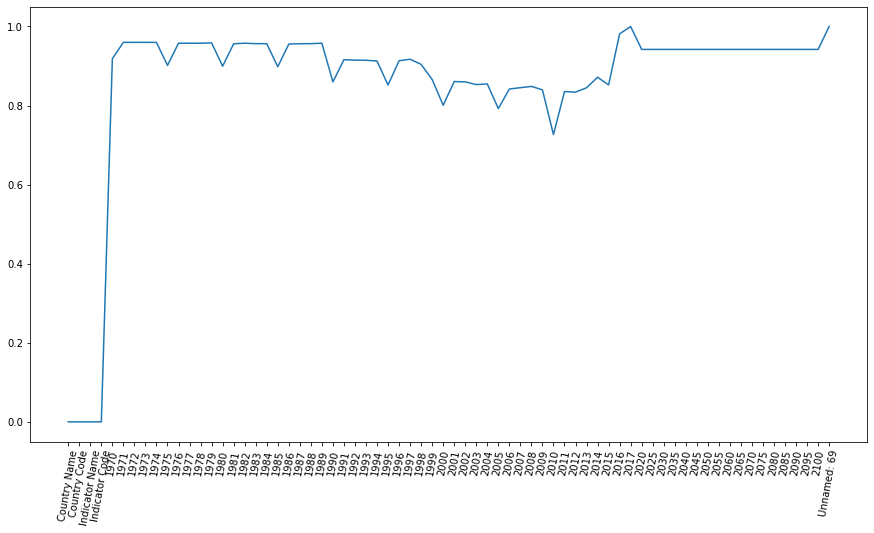

In [332]:
plt.figure(figsize = (15,8))
g=sns.lineplot(data=(df_data.isna().sum()/df_data.shape[0]))
plt.xticks(rotation=80)
plt.show()

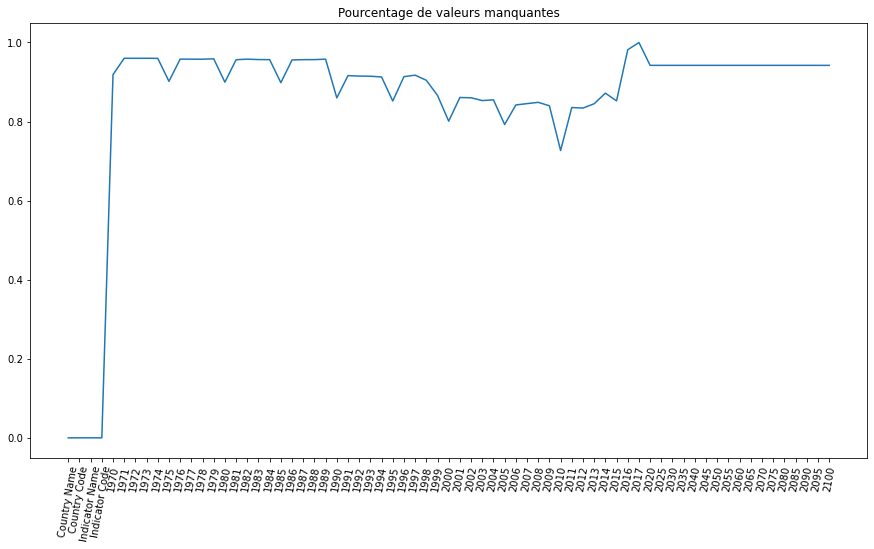

In [344]:
plt.figure(figsize = (15,8))
g=sns.lineplot(data=(df_data.drop(['Unnamed: 69'],axis=1).isna().sum()/df_data.drop(['Unnamed: 69'],axis=1).shape[0]))
g.set_title('Pourcentage de valeurs manquantes')
plt.xticks(rotation=80)
plt.show()

In [345]:
(df_data.loc[:,'2000':'2020'].isna().sum()/df_data.loc[:,'2000':'2020'].shape[0]).sort_values(ascending=True)

2010    0.726650
2005    0.792421
2000    0.800801
2012    0.833962
2011    0.835374
2009    0.839775
2006    0.841800
2013    0.844961
2007    0.845228
2008    0.848481
2015    0.852234
2003    0.853018
2004    0.854764
2002    0.859961
2001    0.860745
2014    0.871705
2020    0.942007
2016    0.981442
2017    0.999839
dtype: float64

<AxesSubplot:>

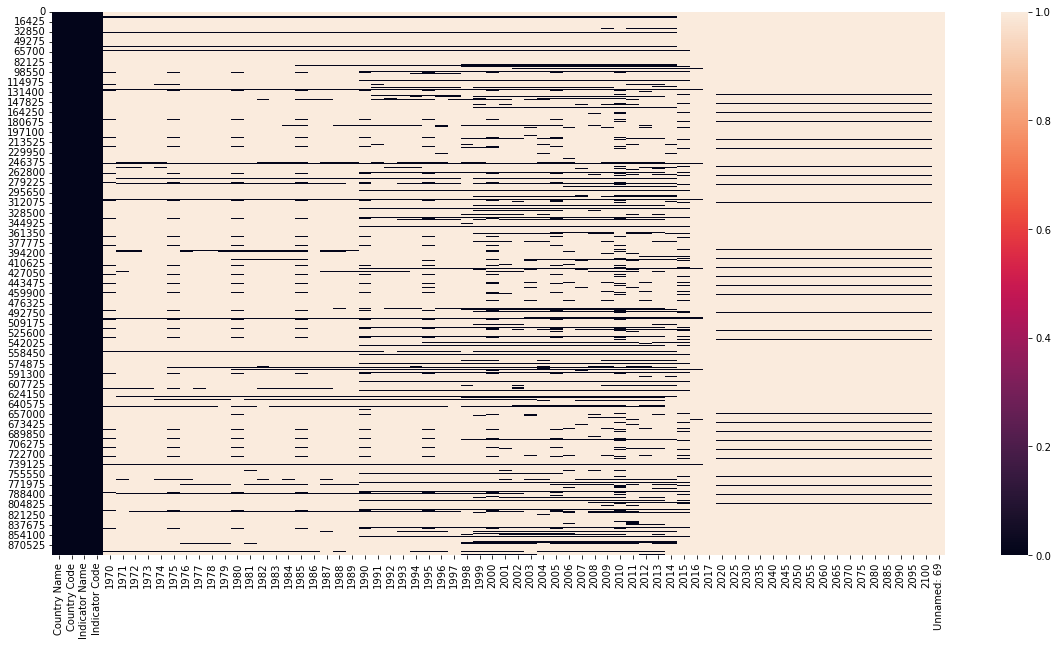

In [59]:
plt.figure(figsize=(20,10))
sns.heatmap(df_data.isna())

### <a name="C6">Récapitulatif concernant fichier 'EdStatsData.csv' :  </a>
886 930 lignes et 70 colonnes --> Valeurs des différents indicateurs par pays et par année (une année par colonne : chaque année de 1970 à 2017 puis de 5 ans en 5 ans de 2020 à 2100 pour les indicateurs de projection).  

A noter, il y a un 'Country Name' en plus par rapport au fichier 'EdStatsCountry.csv' qui est 'British Virgin Islands', il y a donc 217 pays/territoires en tout.  

Toutes les valeurs dans les colonnes des années sont bien des 'float'.  
Il n'y a pas de lignes dupliquées.  
Mais il y a beaucoup de valeurs manquantes car sur chaque année il y a plus de 72% de valeurs manquantes (tous pays et tous indicateurs confondus).

# <a name="C7">Partie 2 : Choix des indicateurs à explorer pour l'analyse</a>
*1. Indicateurs permettant d'évaluer le potentiel marché d'un pays (c'est à dire les personnes de la population active avec au minimum un niveau lycée (='secondary schooling completed')) :*  
- "Labor force with intermediate education (% of total)"  
 "Labor force with advanced education (% of total)"  
 "Labor force, total"  
  
 OU  


- "Barro-Lee: Percentage of population age X with secondary schooling. Completed Secondary"  
 "Barro-Lee: Percentage of population age X with tertiary schooling. Total (Incomplete and Completed Tertiary)"  
 "Barro-Lee: Population in thousands, age X, total"  
 avec X=['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59']  
 
--> Analyser lesquel de ces groupes d'indicateurs a le plus de données intéressantes.  
  

*2. Indicateurs évaluant le nombre d'utilisateurs internet d'un pays ainsi que la possession d'un ordinateur personnel :*  
- "Internet users (per 100 people)"  
- "Personal computers (per 100 people)"  

*3. Potentiel économique d'un pays :*  
- "GDP per capita, PPP (current international $)"
- Colonne "Income Group" du fichier 'EdStatsCountry.csv'  

*4. Plus forte nécessité ou non d'avoir un service de formation disponible (hypothèse : plus il y a de chômage, plus le besoin de formation est fort) :*  
- "Unemployment, total (% of total labor force)"
- "Labor force, total"  

*5. Indication de l'évolution du marché potentiel sur les prochaines années :*  
- "Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total"
- "Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total"

## <a name="C8">1. Indicateurs permettant d'évaluer le potentiel marché d'un pays</a>

In [60]:
df_intermEdPop = df_data[df_data['Indicator Name']=='Labor force with intermediate education (% of total)']

In [61]:
df_intermEdPop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
1382,Arab World,ARB,Labor force with intermediate education (% of ...,SL.TLF.INTM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5047,East Asia & Pacific,EAS,Labor force with intermediate education (% of ...,SL.TLF.INTM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8712,East Asia & Pacific (excluding high income),EAP,Labor force with intermediate education (% of ...,SL.TLF.INTM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12377,Euro area,EMU,Labor force with intermediate education (% of ...,SL.TLF.INTM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.555777,64.783814,64.730743,64.711138,65.922596,66.223761,66.357896,66.608619,66.836533,66.398943,66.782628,66.642126,66.535061,66.869602,67.121092,67.129926,67.246047,67.021054,66.469054,66.045712,65.955199,65.403786,65.225887,64.846968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16042,Europe & Central Asia,ECS,Labor force with intermediate education (% of ...,SL.TLF.INTM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.580058,66.095027,65.865431,65.551360,65.196142,64.916489,64.638529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df_intermEdPop.shape

(242, 70)

In [63]:
df_intermEdPop['Country Name'].unique().size

242

In [64]:
# On enlève les groupements de pays tels que 'Arab World', 'East Asia & Pacific' etc pour l'analyse. 
# On reprend le filtre des pays/groupements de pays n'ayant pas de 'Region' ou 'Income Group' renseignés. 
# Ce qui signifie que l'on sort également Gibralar et Nauru de l'analyse.

filtre_pays = df_country[(df_country['Income Group'].isna())&(df_country['Region'].isna())]['Country Code']

In [65]:
df_intermEdPop=df_intermEdPop[~df_intermEdPop['Country Code'].isin(filtre_pays)]

In [66]:
df_intermEdPop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
93007,Afghanistan,AFG,Labor force with intermediate education (% of ...,SL.TLF.INTM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96672,Albania,ALB,Labor force with intermediate education (% of ...,SL.TLF.INTM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.900002,64.150002,59.18,59.330002,60.119999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100337,Algeria,DZA,Labor force with intermediate education (% of ...,SL.TLF.INTM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104002,American Samoa,ASM,Labor force with intermediate education (% of ...,SL.TLF.INTM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107667,Andorra,AND,Labor force with intermediate education (% of ...,SL.TLF.INTM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df_intermEdPop.shape

(215, 70)

In [68]:
df_intermEdPop.isna().sum()/df_intermEdPop.shape[0]

Country Name      0.0
Country Code      0.0
Indicator Name    0.0
Indicator Code    0.0
1970              1.0
                 ... 
2085              1.0
2090              1.0
2095              1.0
2100              1.0
Unnamed: 69       1.0
Length: 70, dtype: float64

In [69]:
(df_intermEdPop.isna().sum()/df_intermEdPop.shape[0]).values

array([0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99534884,
       0.99534884, 0.99534884, 0.99534884, 0.99534884, 0.99069767,
       0.99069767, 0.94418605, 0.94418605, 0.94418605, 0.93023256,
       0.91162791, 0.89302326, 0.88837209, 0.86511628, 0.84186047,
       0.84186047, 0.8372093 , 0.8372093 , 0.8372093 , 0.83255814,
       0.82790698, 0.82790698, 0.81395349, 0.75348837, 0.73023256,
       0.66976744, 0.66046512, 0.66976744, 0.72093023, 0.73953488,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

<AxesSubplot:>

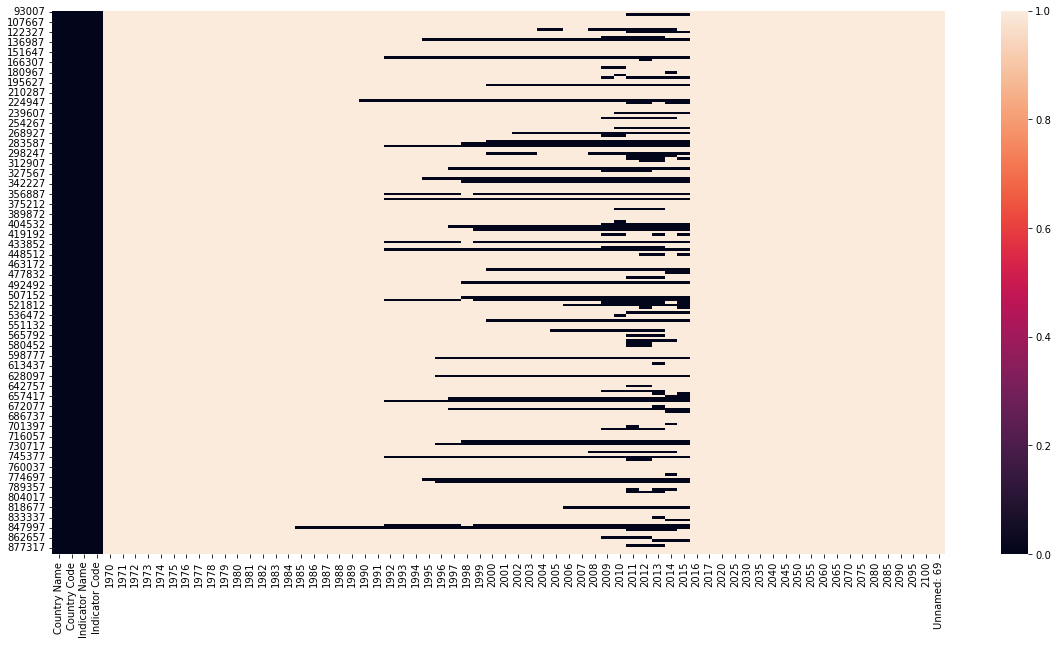

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(df_intermEdPop.isna())

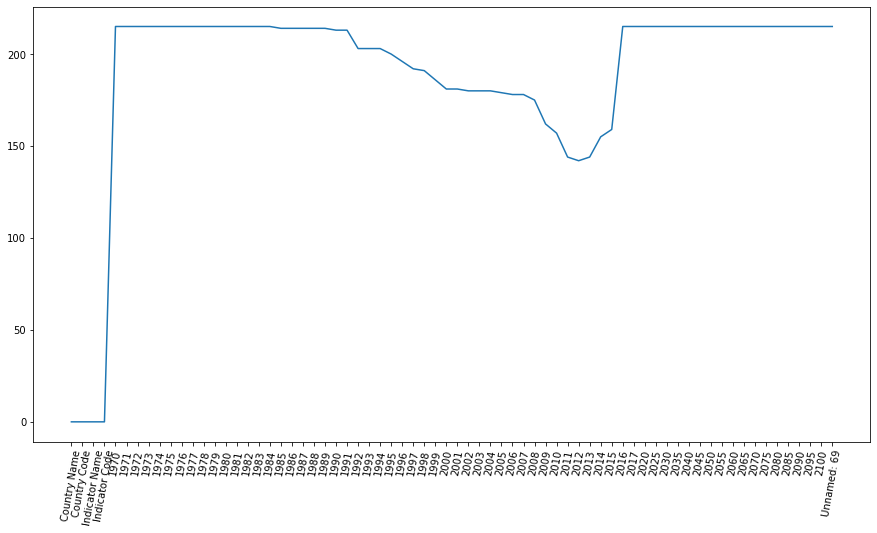

In [71]:
plt.figure(figsize = (15,8))
sns.lineplot(data=df_intermEdPop.isna().sum())
plt.xticks(rotation=80)
plt.show()

In [72]:
df_intermEdPop.notna().sum().sort_values(ascending=False).head(10)

Country Name      215
Indicator Code    215
Country Code      215
Indicator Name    215
2012               73
2013               71
2011               71
2014               60
2010               58
2015               56
dtype: int64

--> On voit que pour l'indicateur "Labor force with intermediate education (% of total)" on a au maximum 73 pays dans l'analyse (correspond aux données de l'année 2012).  
--> Vérifions s'il est possible de combiner plusieurs années pour avoir un nombre plus important de pays dans l'analyse.  
Pour cela, on se limite aux années 2000 à 2017 pour prendre les années les plus "récentes".

In [73]:
range_2000_2017 = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']

In [74]:
# Méthode : on crée une série qui contient tous les 'Country Code' avec des valeurs non vide pour chaque année.
# Puis on enlève les doublons de cette série pour ne garder que les 'Country Code' avec au moins une valeur non vide entre 2000 et 2017.

serie_checkInterm=pd.Series(dtype=str)
for i in range_2000_2017:
    serie_checkInterm=pd.concat([serie_checkInterm,df_intermEdPop[df_intermEdPop[i].notna()]['Country Code']])
serie_checkInterm

133322    AUT
158977    BEL
199292    BGR
221282    CAN
279922    CYP
         ... 
818677    TUR
837002    UKR
844332    GBR
847997    USA
866322    VNM
Length: 765, dtype: object

In [75]:
serie_checkInterm.drop_duplicates(inplace=True)

In [76]:
serie_checkInterm

133322    AUT
158977    BEL
199292    BGR
221282    CAN
279922    CYP
         ... 
657417    PHL
679407    RUS
697732    SAU
771032    SUR
837002    UKR
Length: 93, dtype: object

In [77]:
serie_checkInterm.size

93

--> On obtient donc un total de 93 pays avec au moins une valeur disponible entre 2000 et 2017 pour l'indicateur "Labor force with intermediate education (% of total)".  
--> Réalisons maintenant la même démarche pour l'indicateur "Labor force with advanced education (% of total)"

In [78]:
df_advancedEdPop = df_data[df_data['Indicator Name']=='Labor force with advanced education (% of total)']

In [79]:
df_advancedEdPop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
1376,Arab World,ARB,Labor force with advanced education (% of total),SL.TLF.ADVN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5041,East Asia & Pacific,EAS,Labor force with advanced education (% of total),SL.TLF.ADVN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8706,East Asia & Pacific (excluding high income),EAP,Labor force with advanced education (% of total),SL.TLF.ADVN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12371,Euro area,EMU,Labor force with advanced education (% of total),SL.TLF.ADVN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.242024,81.792895,81.680944,81.785754,81.443248,81.088576,79.910524,79.222858,79.031451,78.72689,78.846319,78.964829,78.796273,78.319514,78.142748,78.012682,78.038694,77.690325,77.350409,77.475332,77.578600,77.198884,76.825014,76.684191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16036,Europe & Central Asia,ECS,Labor force with advanced education (% of total),SL.TLF.ADVN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.019724,78.577521,78.531341,78.396461,78.335199,78.384581,78.530180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df_advancedEdPop.shape

(242, 70)

In [81]:
df_advancedEdPop['Country Name'].unique().size

242

In [82]:
df_advancedEdPop=df_advancedEdPop[~df_advancedEdPop['Country Code'].isin(filtre_pays)]

In [83]:
df_advancedEdPop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
93001,Afghanistan,AFG,Labor force with advanced education (% of total),SL.TLF.ADVN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96666,Albania,ALB,Labor force with advanced education (% of total),SL.TLF.ADVN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.559998,74.25,74.199997,74.07,73.199997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100331,Algeria,DZA,Labor force with advanced education (% of total),SL.TLF.ADVN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103996,American Samoa,ASM,Labor force with advanced education (% of total),SL.TLF.ADVN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107661,Andorra,AND,Labor force with advanced education (% of total),SL.TLF.ADVN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df_advancedEdPop.shape

(215, 70)

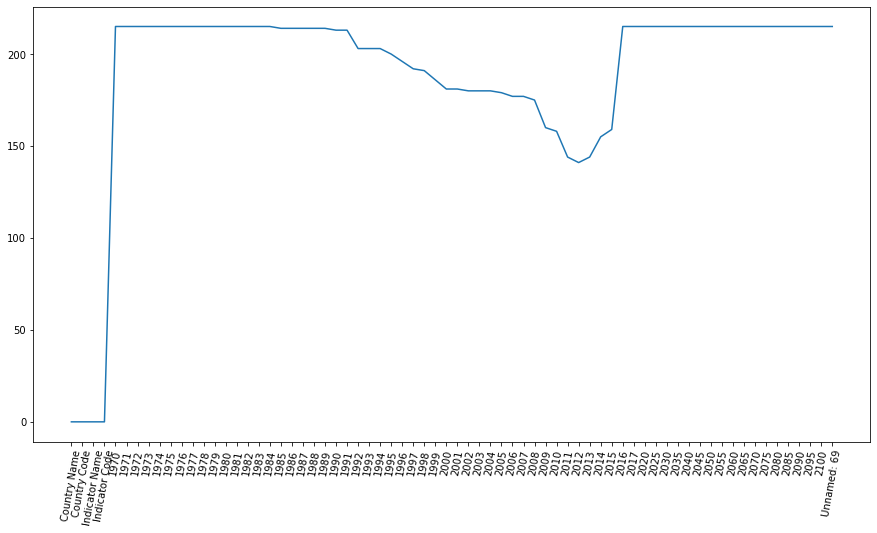

In [85]:
plt.figure(figsize = (15,8))
sns.lineplot(data=df_advancedEdPop.isna().sum())
plt.xticks(rotation=80)
plt.show()

In [86]:
df_advancedEdPop.notna().sum().sort_values(ascending=False).head(10)

Country Name      215
Indicator Code    215
Country Code      215
Indicator Name    215
2012               74
2013               71
2011               71
2014               60
2010               57
2015               56
dtype: int64

In [87]:
serie_checkAdvanc=pd.Series(dtype=str)
for i in range_2000_2017:
    serie_checkAdvanc=pd.concat([serie_checkAdvanc,df_intermEdPop[df_intermEdPop[i].notna()]['Country Code']])
serie_checkAdvanc

133322    AUT
158977    BEL
199292    BGR
221282    CAN
279922    CYP
         ... 
818677    TUR
837002    UKR
844332    GBR
847997    USA
866322    VNM
Length: 765, dtype: object

In [88]:
serie_checkAdvanc.drop_duplicates(inplace=True)

In [89]:
serie_checkAdvanc.size

93

In [90]:
(serie_checkInterm == serie_checkAdvanc).sum()

93

--> On obtient la même chose avec l'indicateur "Labor force with advanced education (% of total)". On retrouve les mêmes 93 pays.  
--> Voyons maintenant si on a bien des valeurs pour l'indicateur "Labor force, total" sur ces 93 pays car on devra par la suite multiplier ces indicateurs si on les utilise.

In [91]:
df_totalLabor = df_data[df_data['Indicator Name']=='Labor force, total']

In [92]:
df_totalLabor.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
1386,Arab World,ARB,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62424351.0,63659319.0,64702880.0,6.714587e+07,6.989220e+07,7.269415e+07,7.468622e+07,7.654614e+07,7.835571e+07,8.106714e+07,8.309214e+07,8.487469e+07,8.705468e+07,9.046055e+07,9.396341e+07,9.736789e+07,1.000584e+08,1.042107e+08,1.078529e+08,1.112134e+08,1.148532e+08,1.183331e+08,1.217115e+08,1.253677e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5051,East Asia & Pacific,EAS,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,951621455.0,968214245.0,985713838.0,1.002360e+09,1.019149e+09,1.034953e+09,1.054216e+09,1.070711e+09,1.085187e+09,1.100115e+09,1.116154e+09,1.128552e+09,1.140527e+09,1.152366e+09,1.163800e+09,1.175050e+09,1.184880e+09,1.195135e+09,1.204079e+09,1.211963e+09,1.218240e+09,1.227079e+09,1.234016e+09,1.240314e+09,1.247171e+09,1.249780e+09,1.255894e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8716,East Asia & Pacific (excluding high income),EAP,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,844837737.0,859300034.0,875266860.0,8.911402e+08,9.065252e+08,9.209474e+08,9.387771e+08,9.538203e+08,9.682104e+08,9.827423e+08,9.979972e+08,1.009677e+09,1.021232e+09,1.032844e+09,1.043736e+09,1.054182e+09,1.063084e+09,1.072138e+09,1.080334e+09,1.087965e+09,1.093711e+09,1.102345e+09,1.108654e+09,1.113819e+09,1.119325e+09,1.120910e+09,1.125980e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12381,Euro area,EMU,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139925882.0,141598600.0,141079092.0,1.411637e+08,1.419528e+08,1.421625e+08,1.431767e+08,1.441723e+08,1.453815e+08,1.469160e+08,1.480722e+08,1.484661e+08,1.505203e+08,1.526754e+08,1.541302e+08,1.561795e+08,1.577118e+08,1.592997e+08,1.608149e+08,1.612562e+08,1.614402e+08,1.609695e+08,1.619662e+08,1.623382e+08,1.626193e+08,1.629675e+08,1.640517e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16046,Europe & Central Asia,ECS,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,389335036.0,391664410.0,391879113.0,3.892341e+08,3.894112e+08,3.894868e+08,3.894587e+08,3.889473e+08,3.898590e+08,3.961573e+08,3.976866e+08,3.972763e+08,3.999491e+08,4.022428e+08,4.050353e+08,4.093429e+08,4.122759e+08,4.161194e+08,4.202455e+08,4.226210e+08,4.249166e+08,4.267391e+08,4.291961e+08,4.315410e+08,4.332733e+08,4.357014e+08,4.385847e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df_totalLabor=df_totalLabor[df_totalLabor['Country Code'].isin(serie_checkInterm)]

In [94]:
df_totalLabor.loc[:,range_2000_2017].isna().sum()

2000     2
2001     2
2002     2
2003     2
2004     2
2005     2
2006     2
2007     2
2008     2
2009     2
2010     2
2011     2
2012     2
2013     2
2014     2
2015     2
2016     2
2017    93
dtype: int64

In [95]:
df_totalLabor[df_totalLabor['2000'].isna()]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
224951,Cayman Islands,CYM,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
474171,Kosovo,XKX,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


--> Il y a donc 2 pays ('Cayman Islands' et 'Kosovo') pour lesquels il n'y a pas de données pour l'indicateur "Labor force, total".  
--> En utilisant les indicateurs "Labor force with intermediate education (% of total)" et "Labor force with advanced education (% of total)" on pourrait donc faire une analyse sur 91 pays.  
--> Analysons quels pays ne seraient pas dans l'analyse.

In [96]:
liste_91pays = df_totalLabor[df_totalLabor['2000'].notna()]['Country Code']

In [97]:
pd.concat([liste_91pays,filtre_pays])

96676     ALB
118666    ARG
122331    ARM
129661    AUS
133326    AUT
         ... 
187       SAS
198       SSA
200       SSF
225       UMC
234       WLD
Name: Country Code, Length: 118, dtype: object

In [98]:
df_country[~df_country['Country Code'].isin(pd.concat([liste_91pays,filtre_pays]))]['Short Name'].values

array(['Aruba', 'Afghanistan', 'Angola', 'Andorra',
       'United Arab Emirates', 'American Samoa', 'Antigua and Barbuda',
       'Azerbaijan', 'Burundi', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bahrain', 'The Bahamas', 'Belarus', 'Bermuda', 'Bolivia',
       'Barbados', 'Brunei', 'Central African Republic',
       'Channel Islands', 'China', "Côte d'Ivoire", 'Cameroon',
       'Dem. Rep. Congo', 'Congo', 'Comoros', 'Cabo Verde', 'Curaçao',
       'Cayman Islands', 'Djibouti', 'Dominica', 'Algeria', 'Eritrea',
       'Fiji', 'Faeroe Islands', 'Micronesia', 'Gabon', 'Georgia',
       'Ghana', 'Guinea', 'The Gambia', 'Guinea-Bissau',
       'Equatorial Guinea', 'Grenada', 'Greenland', 'Guam', 'Guyana',
       'Haiti', 'Isle of Man', 'India', 'Iran', 'Iraq', 'Jamaica',
       'Jordan', 'Kazakhstan', 'Kenya', 'Cambodia', 'Kiribati',
       'St. Kitts and Nevis', 'Kuwait', 'Lao PDR', 'Lebanon', 'Liberia',
       'Libya', 'St. Lucia', 'Liechtenstein', 'Lesotho',
       'St. Martin (F

--> On peut remarquer qu'il y a notamment la Chine et l'Inde qui ne sont pas inclus dans la liste des 91 pays, or ces pays pourraient être intéressant à analyser étant donné leur population.  
--> Analysons maintenant les indicateurs Barro-Lee cités précédemment :

In [99]:
# On filtre d'abord le df_data pour enlever les 'Country Code' représentant des groupements de pays (on enlève également du même coup Gibraltar et Nauru)

df_dataFiltered = df_data[~df_data['Country Code'].isin(filtre_pays)]

In [100]:
# On démarre ensuite par l'indicateur "Barro-Lee: Percentage of population age X with secondary schooling. Completed Secondary"
# avec X=['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59']

range_age=['20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59']

df_checkDataSec=pd.DataFrame(index=range_2000_2017)
for i in range_age:
    df_checkDataSec[i]=df_dataFiltered[df_dataFiltered['Indicator Name']=='Barro-Lee: Percentage of population age '+i+' with secondary schooling. Completed Secondary'].loc[:,range_2000_2017].notna().sum()

# df_checkDataSec --> Donne le nombre de pays avec des données pour cet indicateur par tranche d'âge et par année.    

In [101]:
df_checkDataSec

,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59
2000,144,144,144,144,144,144,144,144
2001,0,0,0,0,0,0,0,0
2002,0,0,0,0,0,0,0,0
2003,0,0,0,0,0,0,0,0
2004,0,0,0,0,0,0,0,0
2005,144,144,144,144,144,144,144,144
2006,0,0,0,0,0,0,0,0
2007,0,0,0,0,0,0,0,0
2008,0,0,0,0,0,0,0,0
2009,0,0,0,0,0,0,0,0


In [102]:
# On fait la même méthode avec l'indicateur "Barro-Lee: Percentage of population age X with tertiary schooling. Total (Incomplete and Completed Tertiary)"

df_checkDataTer=pd.DataFrame(index=range_2000_2017)
for i in range_age:
    df_checkDataTer[i]=df_dataFiltered[df_dataFiltered['Indicator Name']=='Barro-Lee: Percentage of population age '+i+' with tertiary schooling. Total (Incomplete and Completed Tertiary)'].loc[:,range_2000_2017].notna().sum()
df_checkDataTer

,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59
2000,144,144,144,144,144,144,144,144
2001,0,0,0,0,0,0,0,0
2002,0,0,0,0,0,0,0,0
2003,0,0,0,0,0,0,0,0
2004,0,0,0,0,0,0,0,0
2005,144,144,144,144,144,144,144,144
2006,0,0,0,0,0,0,0,0
2007,0,0,0,0,0,0,0,0
2008,0,0,0,0,0,0,0,0
2009,0,0,0,0,0,0,0,0


In [103]:
# On fait également la même méthode avec l'indicateur "Barro-Lee: Population in thousands, age X, total"

df_checkDataPop=pd.DataFrame(index=range_2000_2017)
for i in range_age:
    df_checkDataPop[i]=df_dataFiltered[df_dataFiltered['Indicator Name']=='Barro-Lee: Population in thousands, age '+i+', total'].loc[:,range_2000_2017].notna().sum()
df_checkDataPop

,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59
2000,144,144,144,144,144,144,144,144
2001,0,0,0,0,0,0,0,0
2002,0,0,0,0,0,0,0,0
2003,0,0,0,0,0,0,0,0
2004,0,0,0,0,0,0,0,0
2005,144,144,144,144,144,144,144,144
2006,0,0,0,0,0,0,0,0
2007,0,0,0,0,0,0,0,0
2008,0,0,0,0,0,0,0,0
2009,0,0,0,0,0,0,0,0


--> On remarque donc que les plus récentes données pour ces indicateurs remontent à 2010 et qu'il semble y avoir 144 pays avec des données mais vérifions que ces 144 pays sont bien les mêmes sur chaque tranche d'âge :

In [104]:
df_nbPaysAvecDataSecTer2010=pd.DataFrame(data=df_dataFiltered[(df_dataFiltered['Indicator Name']=='Barro-Lee: Population in thousands, age 20-24, total') & (df_dataFiltered['2010'].notna())]['Country Code'])

In [105]:
for i in range_age:
    df_merge1=pd.DataFrame(data=df_dataFiltered[(df_dataFiltered['Indicator Name']=='Barro-Lee: Population in thousands, age '+i+', total') & (df_dataFiltered['2010'].notna())]['Country Code'])
    df_merge2=pd.DataFrame(data=df_dataFiltered[(df_dataFiltered['Indicator Name']=='Barro-Lee: Percentage of population age '+i+' with tertiary schooling. Total (Incomplete and Completed Tertiary)') & (df_dataFiltered['2010'].notna())]['Country Code'])
    df_merge3=pd.DataFrame(data=df_dataFiltered[(df_dataFiltered['Indicator Name']=='Barro-Lee: Percentage of population age '+i+' with secondary schooling. Completed Secondary') & (df_dataFiltered['2010'].notna())]['Country Code'])
    df_nbPaysAvecDataSecTer2010=df_nbPaysAvecDataSecTer2010.merge(df_merge1)
    df_nbPaysAvecDataSecTer2010=df_nbPaysAvecDataSecTer2010.merge(df_merge2)
    df_nbPaysAvecDataSecTer2010=df_nbPaysAvecDataSecTer2010.merge(df_merge3)

df_nbPaysAvecDataSecTer2010

,Country Code
0,AFG
1,ALB
2,DZA
3,ARG
4,ARM
...,...
139,VEN
140,VNM
141,YEM
142,ZMB


In [106]:
df_nbPaysAvecDataSecTer2010.shape

(144, 1)

--> On retrouve bien les 144 mêmes pays pour chaque tranche d'âge sur 2010.
--> Vérifions si les 144 pays pour 2000 et 2005 sont également les mêmes au cas où on pourrait étendre le nombre de pays si ce n'était pas les mêmes 144 pays.

In [107]:
df_nbPaysAvecDataSecTer2005=pd.DataFrame(data=df_dataFiltered[(df_dataFiltered['Indicator Name']=='Barro-Lee: Population in thousands, age 20-24, total') & (df_dataFiltered['2005'].notna())]['Country Code'])

for i in range_age:
    df_merge1=pd.DataFrame(data=df_dataFiltered[(df_dataFiltered['Indicator Name']=='Barro-Lee: Population in thousands, age '+i+', total') & (df_dataFiltered['2005'].notna())]['Country Code'])
    df_merge2=pd.DataFrame(data=df_dataFiltered[(df_dataFiltered['Indicator Name']=='Barro-Lee: Percentage of population age '+i+' with tertiary schooling. Total (Incomplete and Completed Tertiary)') & (df_dataFiltered['2005'].notna())]['Country Code'])
    df_merge3=pd.DataFrame(data=df_dataFiltered[(df_dataFiltered['Indicator Name']=='Barro-Lee: Percentage of population age '+i+' with secondary schooling. Completed Secondary') & (df_dataFiltered['2005'].notna())]['Country Code'])
    df_nbPaysAvecDataSecTer2005=df_nbPaysAvecDataSecTer2005.merge(df_merge1)
    df_nbPaysAvecDataSecTer2005=df_nbPaysAvecDataSecTer2005.merge(df_merge2)
    df_nbPaysAvecDataSecTer2005=df_nbPaysAvecDataSecTer2005.merge(df_merge3)

df_nbPaysAvecDataSecTer2005

,Country Code
0,AFG
1,ALB
2,DZA
3,ARG
4,ARM
...,...
139,VEN
140,VNM
141,YEM
142,ZMB


In [108]:
df_nbPaysAvecDataSecTer2000=pd.DataFrame(data=df_dataFiltered[(df_dataFiltered['Indicator Name']=='Barro-Lee: Population in thousands, age 20-24, total') & (df_dataFiltered['2000'].notna())]['Country Code'])

for i in range_age:
    df_merge1=pd.DataFrame(data=df_dataFiltered[(df_dataFiltered['Indicator Name']=='Barro-Lee: Population in thousands, age '+i+', total') & (df_dataFiltered['2000'].notna())]['Country Code'])
    df_merge2=pd.DataFrame(data=df_dataFiltered[(df_dataFiltered['Indicator Name']=='Barro-Lee: Percentage of population age '+i+' with tertiary schooling. Total (Incomplete and Completed Tertiary)') & (df_dataFiltered['2000'].notna())]['Country Code'])
    df_merge3=pd.DataFrame(data=df_dataFiltered[(df_dataFiltered['Indicator Name']=='Barro-Lee: Percentage of population age '+i+' with secondary schooling. Completed Secondary') & (df_dataFiltered['2000'].notna())]['Country Code'])
    df_nbPaysAvecDataSecTer2000=df_nbPaysAvecDataSecTer2000.merge(df_merge1)
    df_nbPaysAvecDataSecTer2000=df_nbPaysAvecDataSecTer2000.merge(df_merge2)
    df_nbPaysAvecDataSecTer2000=df_nbPaysAvecDataSecTer2000.merge(df_merge3)

df_nbPaysAvecDataSecTer2000

,Country Code
0,AFG
1,ALB
2,DZA
3,ARG
4,ARM
...,...
139,VEN
140,VNM
141,YEM
142,ZMB


In [109]:
df_nbPaysAvecDataSecTer2010=df_nbPaysAvecDataSecTer2010.merge(df_nbPaysAvecDataSecTer2005)

In [110]:
df_nbPaysAvecDataSecTer2010.shape

(144, 1)

In [111]:
df_nbPaysAvecDataSecTer2010=df_nbPaysAvecDataSecTer2010.merge(df_nbPaysAvecDataSecTer2000)

In [112]:
df_nbPaysAvecDataSecTer2010.shape

(144, 1)

-------->> On retrouve bien les mêmes 144 pays pour les années 2000, 2005 et 2010.  
-------->> En utilisant ces indicateurs, nous avons donc 144 pays versus 91 pays en utilisant les indicateurs sur la 'labor force' soit 58% de pays en plus.  
-------->> On part donc sur les indicateurs 'Barro-Lee' pour estimer le marché potentiel par pays en utilisant les données de 2010 qui sont les plus récentes à disposition.  
-------->> Vérifions tout de même les pays qui ne font pas partie des 144 ayant des données.

In [113]:
df_country[~df_country['Country Code'].isin(pd.concat([df_nbPaysAvecDataSecTer2010['Country Code'],filtre_pays]))]['Short Name'].values

array(['Aruba', 'Angola', 'Andorra', 'American Samoa',
       'Antigua and Barbuda', 'Azerbaijan', 'Burkina Faso', 'The Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Bermuda', 'Bhutan',
       'Channel Islands', 'Comoros', 'Cabo Verde', 'Curaçao',
       'Cayman Islands', 'Djibouti', 'Dominica', 'Eritrea', 'Ethiopia',
       'Faeroe Islands', 'Micronesia', 'Georgia', 'Guinea',
       'Guinea-Bissau', 'Equatorial Guinea', 'Grenada', 'Greenland',
       'Guam', 'Isle of Man', 'Kiribati', 'St. Kitts and Nevis',
       'Lebanon', 'St. Lucia', 'Liechtenstein',
       'St. Martin (French part)', 'Monaco', 'Madagascar',
       'Marshall Islands', 'Macedonia', 'Montenegro',
       'Northern Mariana Islands', 'New Caledonia', 'Nigeria', 'Oman',
       'Palau', 'Puerto Rico', "Dem. People's Rep. Korea",
       'West Bank and Gaza', 'French Polynesia', 'Solomon Islands',
       'San Marino', 'Somalia', 'South Sudan', 'São Tomé and Principe',
       'Suriname', 'Sint Maarten (Dutch part)'

In [114]:
liste_paysNotAnalysed = df_country[~df_country['Country Code'].isin(pd.concat([df_nbPaysAvecDataSecTer2010['Country Code'],filtre_pays]))]['Country Code']

In [115]:
liste_paysNotAnalysed.size

70

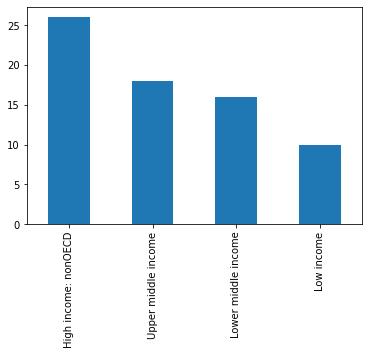

In [116]:
df_country[df_country['Country Code'].isin(liste_paysNotAnalysed)]["Income Group"].value_counts().plot(kind='bar')
plt.show()

In [117]:
df_paysNotAnalysed = df_data[(df_data['Country Code'].isin(liste_paysNotAnalysed))&(df_data['Indicator Name']=='Population, total')].loc[:,['Country Code','Country Name','Indicator Name','2016']].sort_values(by='2016', ascending=False)

In [118]:
df_paysNotAnalysed.head(10)

,Country Code,Country Name,Indicator Name,2016
621918,NGA,Nigeria,"Population, total",185989640.0
325053,ETH,Ethiopia,"Population, total",102403196.0
856478,UZB,Uzbekistan,"Population, total",31848200.0
112483,AGO,Angola,"Population, total",28813463.0
467988,PRK,"Korea, Dem. People’s Rep.","Population, total",25368620.0
526628,MDG,Madagascar,"Population, total",24894551.0
204108,BFA,Burkina Faso,"Population, total",18646433.0
233428,TCD,Chad,"Population, total",14452543.0
735533,SOM,Somalia,"Population, total",14317996.0
387358,GIN,Guinea,"Population, total",12395924.0


In [119]:
df_paysNotAnalysed = df_paysNotAnalysed.merge(df_country.loc[:,['Country Code', 'Income Group']])

In [352]:
pd.set_option('display.float_format',  '{:,.0f}'.format)

df_paysNotAnalysed.head(15)

,Country Code,Country Name,Indicator Name,2016,Income Group
0,NGA,Nigeria,"Population, total","185,989,640",Lower middle income
1,ETH,Ethiopia,"Population, total","102,403,196",Low income
2,UZB,Uzbekistan,"Population, total","31,848,200",Lower middle income
3,AGO,Angola,"Population, total","28,813,463",Upper middle income
4,PRK,"Korea, Dem. People’s Rep.","Population, total","25,368,620",Low income
5,MDG,Madagascar,"Population, total","24,894,551",Low income
6,BFA,Burkina Faso,"Population, total","18,646,433",Low income
7,TCD,Chad,"Population, total","14,452,543",Low income
8,SOM,Somalia,"Population, total","14,317,996",Low income
9,GIN,Guinea,"Population, total","12,395,924",Low income


In [354]:
pd.reset_option('display.float_format')

In [121]:
df_country['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

-------->> Dans les pays qui ne sont pas dans les 144 cités précédemment, si on les classe par nombre d'habitants, on voit que dans les 10 premiers pays il y a en a 9 en 'Low income' ou 'Lower middle income' et 1 en 'Upper middle income' qui est l'Angola.  

C'est donc moins gênant pour la suite car on peut penser qu'il y aura un seuil au niveau de l'income group pour les pays intéressants à analyser, le seuil pouvant être au minimum 'Upper middle income'.  

Par ailleurs les pays après le top 10 font moins de 10 millions d'habitants et on peut penser qu'il y aura des pays avec un potentiel marché bien plus important donc ça ne semble pas être gênant non plus qu'ils ne soient pas dans l'analyse.  

**Conclusion** : On part sur les indicateurs suivants pour calculer le potentiel marché d'un pays et notre analyse se fera sur 144 pays au total   
- "Barro-Lee: Percentage of population age X with secondary schooling. Completed Secondary"
- "Barro-Lee: Percentage of population age X with tertiary schooling. Total (Incomplete and Completed Tertiary)"
- "Barro-Lee: Population in thousands, age X, total"  
avec X=['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59']

## <a name="C9">2. Indicateurs évaluant le nombre d'utilisateurs internet d'un pays ainsi que la possession d'un ordinateur personnel</a>

In [122]:
df_dataCountryAnalysed = df_dataFiltered[df_dataFiltered['Country Code'].isin(df_nbPaysAvecDataSecTer2010['Country Code'])]

In [123]:
df_dataCountryAnalysed

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.260189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.059870,NaN,NaN,NaN,NaN,NaN,47.436790,50.627232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.53138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.431810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.223100,NaN,NaN,NaN,NaN,NaN,34.073261,37.641541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.22154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.386230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.379130,NaN,NaN,NaN,NaN,NaN,0.567060,0.598370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,11.42652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.420429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.152851,NaN,NaN,NaN,NaN,NaN,60.087059,62.906952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91629,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47631.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38800.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.021851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.411362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.428120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.812241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.353439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.188350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.903920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.977340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02828,NaN,NaN,1.063890,NaN,NaN,NaN,NaN,NaN,N

In [124]:
df_dataCountryAnalysed['Country Code'].unique().size

144

In [125]:
df_dataCountryAnalysed[df_dataCountryAnalysed['Indicator Name']=='Internet users (per 100 people)'].loc[:,range_2000_2017].isna().sum()

2000      5
2001      2
2002      3
2003      5
2004      3
2005      3
2006      5
2007      0
2008      1
2009      1
2010      0
2011      0
2012      1
2013      0
2014      0
2015      0
2016      0
2017    144
dtype: int64

In [126]:
df_dataCountryAnalysed[df_dataCountryAnalysed['Indicator Name']=='Personal computers (per 100 people)'].loc[:,range_2000_2017].isna().sum()

2000     13
2001      7
2002      8
2003     10
2004     11
2005     15
2006     63
2007    107
2008    121
2009    142
2010    144
2011    144
2012    144
2013    144
2014    144
2015    144
2016    144
2017    144
dtype: int64

In [127]:
df_dataCountryAnalysed[df_dataCountryAnalysed['Indicator Name']=='Personal computers (per 100 people)'].loc[:,range_2000_2017].isna().mean()

2000    0.090278
2001    0.048611
2002    0.055556
2003    0.069444
2004    0.076389
2005    0.104167
2006    0.437500
2007    0.743056
2008    0.840278
2009    0.986111
2010    1.000000
2011    1.000000
2012    1.000000
2013    1.000000
2014    1.000000
2015    1.000000
2016    1.000000
2017    1.000000
dtype: float64

-------->> On remarque que pour l'indicateur 'Internet users (per 100 people)' il n'y a pas de valeurs manquantes sur les 144 pays de l'analyse pour les années 2013 à 2016.  

-------->> Par contre pour l'indicateur 'Personal computers (per 100 people)' à partir de 2006 il y a plus de 43% de valeurs manquantes pour progressivement atteindre 100% de valeurs manquantes à partir de 2010. Cette indicateur ne sera donc pas retenu pour l'analyse.

## <a name="C10">3. Potentiel économique d'un pays</a>

In [128]:
df_dataCountryAnalysed[df_dataCountryAnalysed['Indicator Name']=='GDP per capita, PPP (current international $)'].loc[:,range_2000_2017].isna().sum()

2000      4
2001      3
2002      2
2003      2
2004      2
2005      2
2006      2
2007      2
2008      2
2009      2
2010      2
2011      2
2012      3
2013      3
2014      3
2015      4
2016      5
2017    144
dtype: int64

In [129]:
df_gdp = df_dataCountryAnalysed[df_dataCountryAnalysed['Indicator Name']=='GDP per capita, PPP (current international $)']

In [130]:
df_gdp[df_gdp['2016'].isna()]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
144182,Bahrain,BHR,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22694.907256,25375.91828,26985.494054,30419.880576,30235.412086,31276.026535,32298.222474,32941.355869,33826.531582,34535.517182,35622.601699,35578.884295,35516.293232,36258.092483,37399.844814,38466.562206,39163.120453,40282.966524,40557.024312,39412.167409,39749.849385,40164.582740,41714.843609,44168.377948,46178.076581,46866.547976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272457,Cuba,CUB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503352,Libya,LBY,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16639.658667,17375.646482,17186.163880,17010.813583,19299.516457,20392.476154,23189.827241,25071.944342,26966.496200,27843.125645,27523.817457,29030.843382,11192.790639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
785557,Syrian Arab Republic,SYR,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862522,"Venezuela, RB",VEN,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9339.954430,10344.99059,10970.091229,11016.078374,10752.108076,11172.374173,11122.521513,11794.055381,11724.111466,10978.916131,11424.204487,11858.333888,10775.348399,9957.685837,11891.624668,13309.697636,14821.148001,16276.925627,17192.915451,16507.341352,16210.289956,16981.335491,18004.465324,18281.192970,17639.136767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df_gdp.loc[df_gdp['Country Name']=='Bahrain','2016']=(df_gdp.loc[df_gdp['Country Name']=='Bahrain','2015']+df_gdp.loc[df_gdp['Country Name']=='Bahrain','2014']+df_gdp.loc[df_gdp['Country Name']=='Bahrain','2013'])/3

C:\Users\bmeur\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [132]:
df_gdp[df_gdp['Country Name']=='Bahrain']

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
144182,Bahrain,BHR,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22694.907256,25375.91828,26985.494054,30419.880576,30235.412086,31276.026535,32298.222474,32941.355869,33826.531582,34535.517182,35622.601699,35578.884295,35516.293232,36258.092483,37399.844814,38466.562206,39163.120453,40282.966524,40557.024312,39412.167409,39749.849385,40164.58274,41714.843609,44168.377948,46178.076581,46866.547976,45737.667502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
df_gdp.loc[df_gdp['Country Name']=='Venezuela, RB','2015']=(df_gdp.loc[df_gdp['Country Name']=='Venezuela, RB','2014']+df_gdp.loc[df_gdp['Country Name']=='Venezuela, RB','2013']+df_gdp.loc[df_gdp['Country Name']=='Venezuela, RB','2012'])/3

C:\Users\bmeur\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [134]:
df_gdp[df_gdp['Country Name']=='Venezuela, RB']

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
862522,"Venezuela, RB",VEN,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9339.95443,10344.99059,10970.091229,11016.078374,10752.108076,11172.374173,11122.521513,11794.055381,11724.111466,10978.916131,11424.204487,11858.333888,10775.348399,9957.685837,11891.624668,13309.697636,14821.148001,16276.925627,17192.915451,16507.341352,16210.289956,16981.335491,18004.465324,18281.19297,17639.136767,17974.931687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
df_gdp.loc[df_gdp['Country Name']=='Venezuela, RB','2016']=(df_gdp.loc[df_gdp['Country Name']=='Venezuela, RB','2015']+df_gdp.loc[df_gdp['Country Name']=='Venezuela, RB','2014']+df_gdp.loc[df_gdp['Country Name']=='Venezuela, RB','2013'])/3

C:\Users\bmeur\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [136]:
df_gdp[df_gdp['Country Name']=='Venezuela, RB']

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
862522,"Venezuela, RB",VEN,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9339.95443,10344.99059,10970.091229,11016.078374,10752.108076,11172.374173,11122.521513,11794.055381,11724.111466,10978.916131,11424.204487,11858.333888,10775.348399,9957.685837,11891.624668,13309.697636,14821.148001,16276.925627,17192.915451,16507.341352,16210.289956,16981.335491,18004.465324,18281.19297,17639.136767,17974.931687,17965.087141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-------->> L'analyse de l'indicateur 'GDP per capita, PPP (current international $)' pour les 144 pays nous montre que l'on ne va pas garder les 3 pays suivants : 'Cuba', 'Libya', 'Syrian Arab Republic' pour cause de valeurs manquantes. On réduit donc l'analyse à 141 pays.    

Concernant 'Bahrain' on a décidé de faire la moyenne sur les 3 années précédentes pour compléter l'année 2016.  

Concernant 'Venezuela, RB', on a décidé de faire la moyene sur les 3 années précédentes pour compléter les années 2015 et 2016.

In [137]:
df_nbPaysAvecDataSecTer2010

,Country Code
0,AFG
1,ALB
2,DZA
3,ARG
4,ARM
...,...
139,VEN
140,VNM
141,YEM
142,ZMB


In [138]:
df_gdp[df_gdp['Country Name'].isin(['Cuba', 'Libya', 'Syrian Arab Republic'])]['Country Code']

272457    CUB
503352    LBY
785557    SYR
Name: Country Code, dtype: object

In [139]:
df_nbPaysAvecDataSecTer2010[df_nbPaysAvecDataSecTer2010['Country Code'].isin(['CUB', 'LBY', 'SYR'])]

,Country Code
31,CUB
74,LBY
124,SYR


In [140]:
df_paysAnalysed = df_nbPaysAvecDataSecTer2010.drop(index=[31, 74, 124])

In [141]:
df_paysAnalysed.shape

(141, 1)

In [142]:
(df_paysAnalysed['Country Code']=='CUB').sum()

0

In [143]:
(df_paysAnalysed['Country Code']=='LBY').sum()

0

In [144]:
(df_paysAnalysed['Country Code']=='SYR').sum()

0

In [145]:
df_dataCountryAnalysed = df_dataCountryAnalysed[df_dataCountryAnalysed['Country Code'].isin(df_paysAnalysed['Country Code'])]

In [146]:
df_dataCountryAnalysed['Country Code'].unique().size

141

## <a name="C11">4. Plus forte nécessité ou non d'avoir un service de formation disponible</a>

In [147]:
df_dataCountryAnalysed[df_dataCountryAnalysed['Indicator Name']=='Unemployment, total (% of total labor force)'].loc[:,range_2000_2017].isna().sum()

2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017    141
dtype: int64

In [148]:
df_dataCountryAnalysed[df_dataCountryAnalysed['Indicator Name']=='Labor force, total'].loc[:,range_2000_2017].isna().sum()

2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017    141
dtype: int64

-------->> Il n'y aucune valeurs manquantes pour les 141 pays concernant les indicateurs 'Unemployment, total (% of total labor force)' et 'Labor force, total'.

## <a name="C12">5. Indication de l'évolution du marché potentiel sur les prochaines années</a>

In [149]:
df_dataCountryAnalysed[df_dataCountryAnalysed['Indicator Name']=='Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total'].loc[:,range_2000_2017].isna().sum()

2000    141
2001    141
2002    141
2003    141
2004    141
2005    141
2006    141
2007    141
2008    141
2009    141
2010     10
2011    141
2012    141
2013    141
2014    141
2015     10
2016    141
2017    141
dtype: int64

In [150]:
df_dataCountryAnalysed[df_dataCountryAnalysed['Indicator Name']=='Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total'].loc[:,'2020':'2035'].isna().sum()

2020    10
2025    10
2030    10
2035    10
dtype: int64

In [154]:
df_dataCountryAnalysed[(df_dataCountryAnalysed['Indicator Name']=='Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total')&(df_dataCountryAnalysed['2020'].isna())]['Country Name'].values

array(['Afghanistan', 'Barbados', 'Botswana', 'Brunei Darussalam', 'Fiji',
       'Mauritania', 'Papua New Guinea', 'Sri Lanka', 'Togo',
       'Yemen, Rep.'], dtype=object)

In [155]:
df_dataCountryAnalysed[df_dataCountryAnalysed['Indicator Name']=='Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total'].loc[:,range_2000_2017].isna().sum()

2000    141
2001    141
2002    141
2003    141
2004    141
2005    141
2006    141
2007    141
2008    141
2009    141
2010     10
2011    141
2012    141
2013    141
2014    141
2015     10
2016    141
2017    141
dtype: int64

In [156]:
df_dataCountryAnalysed[df_dataCountryAnalysed['Indicator Name']=='Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total'].loc[:,'2020':'2035'].isna().sum()

2020    10
2025    10
2030    10
2035    10
dtype: int64

In [157]:
df_dataCountryAnalysed[(df_dataCountryAnalysed['Indicator Name']=='Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total')&(df_dataCountryAnalysed['2020'].isna())]['Country Name'].values

array(['Afghanistan', 'Barbados', 'Botswana', 'Brunei Darussalam', 'Fiji',
       'Mauritania', 'Papua New Guinea', 'Sri Lanka', 'Togo',
       'Yemen, Rep.'], dtype=object)

-------->> Pour analyser les projections d'évolution de population avec un niveau d'éducation maximum 'upper secondary' ou 'post secondary' il y a aurait donc des valeurs manquantes pour les 10 pays suivants : 'Afghanistan', 'Barbados', 'Botswana', 'Brunei Darussalam', 'Fiji', 'Mauritania', 'Papua New Guinea', 'Sri Lanka', 'Togo', 'Yemen, Rep.'.  

On peut donc conserver ces indicateurs pour donner une indication d'évolution du marché pour les pays les mieux classés à la fin de l'analyse même s'il n'y a pas d'incicateurs concernant la population avec un niveau d'éducation maximum 'tertiary'.

# <a name="C13">Partie 3 : Création du jeu de données final pour l'analyse</a>

In [160]:
serie_indicatorsName=pd.Series(dtype=str)

In [161]:
for i in range_age:
    s1=pd.Series(['Barro-Lee: Percentage of population age '+i+' with secondary schooling. Completed Secondary'])
    s2=pd.Series(['Barro-Lee: Percentage of population age '+i+' with tertiary schooling. Total (Incomplete and Completed Tertiary)'])
    s3=pd.Series(['Barro-Lee: Population in thousands, age '+i+', total'])
    serie_indicatorsName=pd.concat([serie_indicatorsName,s1,s2,s3])

serie_indicatorsName.values

array(['Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary',
       'Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)',
       'Barro-Lee: Population in thousands, age 20-24, total',
       'Barro-Lee: Percentage of population age 25-29 with secondary schooling. Completed Secondary',
       'Barro-Lee: Percentage of population age 25-29 with tertiary schooling. Total (Incomplete and Completed Tertiary)',
       'Barro-Lee: Population in thousands, age 25-29, total',
       'Barro-Lee: Percentage of population age 30-34 with secondary schooling. Completed Secondary',
       'Barro-Lee: Percentage of population age 30-34 with tertiary schooling. Total (Incomplete and Completed Tertiary)',
       'Barro-Lee: Population in thousands, age 30-34, total',
       'Barro-Lee: Percentage of population age 35-39 with secondary schooling. Completed Secondary',
       'Barro-Lee: Percentage of p

In [162]:
df_dataCleanedFinal = df_dataCountryAnalysed[df_dataCountryAnalysed['Indicator Name'].isin(serie_indicatorsName)]

In [163]:
df_dataCleanedFinal.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
92016,Afghanistan,AFG,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,0.99,NaN,NaN,NaN,NaN,1.02,NaN,NaN,NaN,NaN,1.83,NaN,NaN,NaN,NaN,3.04,NaN,NaN,NaN,NaN,2.96,NaN,NaN,NaN,NaN,2.43,NaN,NaN,NaN,NaN,10.33,NaN,NaN,NaN,NaN,12.87,NaN,NaN,NaN,NaN,15.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92019,Afghanistan,AFG,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.ICMP.2024.ZS,7.10,NaN,NaN,NaN,NaN,7.10,NaN,NaN,NaN,NaN,8.80,NaN,NaN,NaN,NaN,8.99,NaN,NaN,NaN,NaN,9.38,NaN,NaN,NaN,NaN,9.59,NaN,NaN,NaN,NaN,9.04,NaN,NaN,NaN,NaN,8.62,NaN,NaN,NaN,NaN,8.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92030,Afghanistan,AFG,Barro-Lee: Percentage of population age 25-29 ...,BAR.SEC.CMPT.2529.ZS,0.35,NaN,NaN,NaN,NaN,1.01,NaN,NaN,NaN,NaN,1.08,NaN,NaN,NaN,NaN,1.89,NaN,NaN,NaN,NaN,3.17,NaN,NaN,NaN,NaN,3.04,NaN,NaN,NaN,NaN,2.46,NaN,NaN,NaN,NaN,10.55,NaN,NaN,NaN,NaN,13.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92033,Afghanistan,AFG,Barro-Lee: Percentage of population age 25-29 ...,BAR.TER.ICMP.2529.ZS,1.90,NaN,NaN,NaN,NaN,7.10,NaN,NaN,NaN,NaN,7.10,NaN,NaN,NaN,NaN,8.79,NaN,NaN,NaN,NaN,8.99,NaN,NaN,NaN,NaN,9.38,NaN,NaN,NaN,NaN,9.59,NaN,NaN,NaN,NaN,9.04,NaN,NaN,NaN,NaN,8.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92037,Afghanistan,AFG,Barro-Lee: Percentage of population age 30-34 ...,BAR.SEC.CMPT.3034.ZS,0.34,NaN,NaN,NaN,NaN,0.36,NaN,NaN,NaN,NaN,1.05,NaN,NaN,NaN,NaN,1.10,NaN,NaN,NaN,NaN,1.94,NaN,NaN,NaN,NaN,3.20,NaN,NaN,NaN,NaN,3.03,NaN,NaN,NaN,NaN,2.48,NaN,NaN,NaN,NaN,10.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
df_dataCleanedFinal = pd.pivot_table(df_dataCleanedFinal,index=['Country Name','Country Code'],columns=['Indicator Name'],values=['2010'])
df_dataCleanedFinal

2010  \
Indicator Name             Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary   
Country Name  Country Code                                                                                               
Afghanistan   AFG                                                       15.60                                            
Albania       ALB                                                       55.96                                            
Algeria       DZA                                                       22.37                                            
Argentina     ARG                                                       45.37                                            
Armenia       ARM                                                       36.47                                            
...                                                                       ...                                            
Venezuela, RB VEN                                                       54.70                                            
Vietnam       VNM                                                       32.91                                            
Yemen, Rep.   YEM                                                       19.24                                            
Zambia        ZMB                                                       15.32                                            
Zimbabwe      ZWE                                                        4.40                                            

                                                                                                                                             \
Indicator Name             Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)   
Country Name  Country Code                                                                                                                    
Afghanistan   AFG                                                        8.20                                                                 
Albania       ALB                                                        4.26                                                                 
Algeria       DZA                                                       25.36                                                                 
Argentina     ARG                                                       14.20                                                                 
Armenia       ARM                                                       50.49                                                                 
...                                                                       ...                                                                 
Venezuela, RB VEN                                                        9.86                                                                 
Vietnam       VNM                                                        5.40                                                                 
Yemen, Rep.   YEM                                                        4.94                                                                 
Zambia        ZMB                                                        0.33                                                                 
Zimbabwe      ZWE                                                        0.47                                                                 

                                                                                                                        \
Indicator Name             Barro-Lee: Percentage of population age 25-29 with secondary schooling. Completed Secondary   
Country Name  Country Code                                                                                               
Afghanistan   AFG                   

In [168]:
# On vérifie que les valeurs des pourcentages sont bien comprises entre 0 et 100 :

(df_dataCleanedFinal.loc[:,('2010','Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary'):('2010','Barro-Lee: Percentage of population age 55-59 with tertiary schooling. Total (Incomplete and Completed Tertiary)')]<0).sum()

      Indicator Name                                                                                                  
2010  Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary                         0
      Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)    0
      Barro-Lee: Percentage of population age 25-29 with secondary schooling. Completed Secondary                         0
      Barro-Lee: Percentage of population age 25-29 with tertiary schooling. Total (Incomplete and Completed Tertiary)    0
      Barro-Lee: Percentage of population age 30-34 with secondary schooling. Completed Secondary                         0
      Barro-Lee: Percentage of population age 30-34 with tertiary schooling. Total (Incomplete and Completed Tertiary)    0
      Barro-Lee: Percentage of population age 35-39 with secondary schooling. Completed Secondary                         0
      Barro-L

In [169]:
(df_dataCleanedFinal.loc[:,('2010','Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary'):('2010','Barro-Lee: Percentage of population age 55-59 with tertiary schooling. Total (Incomplete and Completed Tertiary)')]>100).sum()

      Indicator Name                                                                                                  
2010  Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary                         0
      Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)    0
      Barro-Lee: Percentage of population age 25-29 with secondary schooling. Completed Secondary                         0
      Barro-Lee: Percentage of population age 25-29 with tertiary schooling. Total (Incomplete and Completed Tertiary)    0
      Barro-Lee: Percentage of population age 30-34 with secondary schooling. Completed Secondary                         0
      Barro-Lee: Percentage of population age 30-34 with tertiary schooling. Total (Incomplete and Completed Tertiary)    0
      Barro-Lee: Percentage of population age 35-39 with secondary schooling. Completed Secondary                         0
      Barro-L

In [181]:
df_dataCleanedFinal.describe()

,"Population in thousands, age 20-59, with completed secondary schooling","Population in thousands, age 20-59, with completed or incompleted tertiary schooling","Population in thousands, age 20-44, with completed secondary schooling","Population in thousands, age 20-44, with completed or incompleted tertiary schooling","Population in thousands, age 45-59, with completed secondary schooling","Population in thousands, age 45-59, with completed or incompleted tertiary schooling","Marché potentiel (2010, en million d'habitants)"
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,6676.460519,3947.889171,5007.333287,2881.904000,1669.127232,1065.985171,10.624350
std,21751.996920,12042.218570,16831.389727,8424.531262,5244.645022,3839.657593,31.339532
min,15.065700,0.584800,14.474300,0.000000,0.591400,0.037000,0.018113
25%,347.014800,95.277700,253.430500,79.527200,49.687400,18.582000,0.468466
50%,1165.551500,549.459000,859.838400,417.400300,229.108800,131.363200,1.963510
75%,4407.487900,2329.904400,3387.224100,1710.028800,1157.853000,535.706400,6.552492
max,190182.328300,102983.591400,141370.473100,65798.763400,48811.855200,37184.828000,232.823613


In [170]:
# Ensuite pour chaque groupe d'âge, on multiplie le pourcentage par la population pour chaque indicateurs en créant une nouvelle colonne.

for i in range_age:
    df_dataCleanedFinal[('2010','Population in thousands, age '+i+', with completed secondary schooling')]=df_dataCleanedFinal[('2010','Barro-Lee: Percentage of population age '+i+' with secondary schooling. Completed Secondary')]*df_dataCleanedFinal[('2010','Barro-Lee: Population in thousands, age '+i+', total')]/100
    df_dataCleanedFinal[('2010','Population in thousands, age '+i+', with completed or incompleted tertiary schooling')]=df_dataCleanedFinal[('2010','Barro-Lee: Percentage of population age '+i+' with tertiary schooling. Total (Incomplete and Completed Tertiary)')]*df_dataCleanedFinal[('2010','Barro-Lee: Population in thousands, age '+i+', total')]/100
    
df_dataCleanedFinal

2010  \
Indicator Name             Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary   
Country Name  Country Code                                                                                               
Afghanistan   AFG                                                       15.60                                            
Albania       ALB                                                       55.96                                            
Algeria       DZA                                                       22.37                                            
Argentina     ARG                                                       45.37                                            
Armenia       ARM                                                       36.47                                            
...                                                                       ...                                            
Venezuela, RB VEN                                                       54.70                                            
Vietnam       VNM                                                       32.91                                            
Yemen, Rep.   YEM                                                       19.24                                            
Zambia        ZMB                                                       15.32                                            
Zimbabwe      ZWE                                                        4.40                                            

                                                                                                                                             \
Indicator Name             Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)   
Country Name  Country Code                                                                                                                    
Afghanistan   AFG                                                        8.20                                                                 
Albania       ALB                                                        4.26                                                                 
Algeria       DZA                                                       25.36                                                                 
Argentina     ARG                                                       14.20                                                                 
Armenia       ARM                                                       50.49                                                                 
...                                                                       ...                                                                 
Venezuela, RB VEN                                                        9.86                                                                 
Vietnam       VNM                                                        5.40                                                                 
Yemen, Rep.   YEM                                                        4.94                                                                 
Zambia        ZMB                                                        0.33                                                                 
Zimbabwe      ZWE                                                        0.47                                                                 

                                                                                                                        \
Indicator Name             Barro-Lee: Percentage of population age 25-29 with secondary schooling. Completed Secondary   
Country Name  Country Code                                                                                               
Afghanistan   AFG                   

In [171]:
df_dataCleanedFinal=df_dataCleanedFinal['2010'].reset_index()

In [172]:
df_dataCleanedFinal.columns.rename(None,inplace=True)

In [173]:
df_dataCleanedFinal

,Country Name,Country Code,Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 25-29 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 25-29 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 30-34 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 30-34 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 35-39 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 35-39 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 40-44 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 40-44 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 45-49 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 45-49 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 50-54 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 50-54 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 55-59 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 55-59 with tertiary schooling. Total (Incomplete and Completed Tertiary),"Barro-Lee: Population in thousands, age 20-24, total","Barro-Lee: Population in thousands, age 25-29, total","Barro-Lee: Population in thousands, age 30-34, total","Barro-Lee: Population in thousands, age 35-39, total","Barro-Lee: Population in thousands, age 40-44, total","Barro-Lee: Population in thousands, age 45-49, total","Barro-Lee: Population in thousands, age 50-54, total","Barro-Lee: Population in thousands, age 55-59, total","Population in thousands, age 20-24, with completed secondary schooling","Population in thousands, age 20-24, with completed or incompleted tertiary schooling","Population in thousands, age 25-29, with completed secondary schooling","Population in thousands, age 25-29, with completed or incompleted tertiary schooling","Population in thousands, age 30-34, with completed secondary schooling","Population in thousands, age 30-34, with completed or incompleted tertiary schooling","Population in thousands, age 35-39, with completed secondary schooling","Population in thousands, age 35-39, with completed or incompleted tertiary schooling","Population in thousands, age 40-44, with completed secondary schooling","Population in thousands, age 40-44, with completed or incompleted tertiary schooling","Population in thousands, age 45-49, with completed secondary schooling","Population in thousands, age 45-49, with completed or incompleted tertiary schooling","Population in thousands, age 50-54, with completed secondary schooling","Population in thousands, age 50-54, with completed or incompleted tertiary schooling","Population in thousands, age 55-59, with completed secondary schooling","Population in thousands, age 55-59, with completed or incompleted tertiary schooling"
0,Afghanistan,AFG,15.60,8.20,13.21,8.62,10.67,9.04,2.44,9.59,3.09,9.38,3.32,8.99,2.10,8.79,1.21,7.10,3162.0,2583.0,2107.0,1741.0,1434.0,1173.0,949.0,751.0,493.2720,259.2840,341.2143,222.6546,224.8169,190.4728,42.4804,166.9619,44.3106,134.5092,38.9436,105.4527,19.9290,83.4171,9.0871,53.3210
1,Albania,ALB,55.96,4.26,44.90,4.77,40.26,2.79,49.85,1.69,49.85,1.69,49.78,0.74,49.78,0.74,44.53,0.58,296.0,255.0,200.0,189.0,203.0,209.0,203.0,154.0,165.6416,12.6096,114.4950,12.1635,80.5200,5.5800,94.2165,3.1941,101.1955,3.4307,104.0402,1.5466,101.0534,1.5022,68.5762,0.8932
2,Algeria,DZA,22.37,25.36,18.50,18.36,19.92,1

In [174]:
"""
On regroupe ensuite les groupes d'âge pour créer 3 nouveaux groupes d'âge qui seront utiliser par la suite :
    - 20-59 ans
    - 20-44 ans
    - 45-59 ans
"""

df_dataCleanedFinal['Population in thousands, age 20-59, with completed secondary schooling']=0
df_dataCleanedFinal['Population in thousands, age 20-59, with completed or incompleted tertiary schooling']=0
df_dataCleanedFinal['Population in thousands, age 20-44, with completed secondary schooling']=0
df_dataCleanedFinal['Population in thousands, age 20-44, with completed or incompleted tertiary schooling']=0
df_dataCleanedFinal['Population in thousands, age 45-59, with completed secondary schooling']=0
df_dataCleanedFinal['Population in thousands, age 45-59, with completed or incompleted tertiary schooling']=0

In [175]:
for i in range_age:
    df_dataCleanedFinal['Population in thousands, age 20-59, with completed secondary schooling']=df_dataCleanedFinal['Population in thousands, age 20-59, with completed secondary schooling']+df_dataCleanedFinal['Population in thousands, age '+i+', with completed secondary schooling']
    df_dataCleanedFinal['Population in thousands, age 20-59, with completed or incompleted tertiary schooling']=df_dataCleanedFinal['Population in thousands, age 20-59, with completed or incompleted tertiary schooling']+df_dataCleanedFinal['Population in thousands, age '+i+', with completed or incompleted tertiary schooling']
    if i in ['20-24','25-29','30-34','35-39','40-44']:
        df_dataCleanedFinal['Population in thousands, age 20-44, with completed secondary schooling']=df_dataCleanedFinal['Population in thousands, age 20-44, with completed secondary schooling']+df_dataCleanedFinal['Population in thousands, age '+i+', with completed secondary schooling']
        df_dataCleanedFinal['Population in thousands, age 20-44, with completed or incompleted tertiary schooling']=df_dataCleanedFinal['Population in thousands, age 20-44, with completed or incompleted tertiary schooling']+df_dataCleanedFinal['Population in thousands, age '+i+', with completed or incompleted tertiary schooling']
        
df_dataCleanedFinal

,Country Name,Country Code,Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 25-29 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 25-29 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 30-34 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 30-34 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 35-39 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 35-39 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 40-44 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 40-44 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 45-49 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 45-49 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 50-54 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 50-54 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 55-59 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 55-59 with tertiary schooling. Total (Incomplete and Completed Tertiary),"Barro-Lee: Population in thousands, age 20-24, total","Barro-Lee: Population in thousands, age 25-29, total","Barro-Lee: Population in thousands, age 30-34, total","Barro-Lee: Population in thousands, age 35-39, total","Barro-Lee: Population in thousands, age 40-44, total","Barro-Lee: Population in thousands, age 45-49, total","Barro-Lee: Population in thousands, age 50-54, total","Barro-Lee: Population in thousands, age 55-59, total","Population in thousands, age 20-24, with completed secondary schooling","Population in thousands, age 20-24, with completed or incompleted tertiary schooling","Population in thousands, age 25-29, with completed secondary schooling","Population in thousands, age 25-29, with completed or incompleted tertiary schooling","Population in thousands, age 30-34, with completed secondary schooling","Population in thousands, age 30-34, with completed or incompleted tertiary schooling","Population in thousands, age 35-39, with completed secondary schooling","Population in thousands, age 35-39, with completed or incompleted tertiary schooling","Population in thousands, age 40-44, with completed secondary schooling","Population in thousands, age 40-44, with completed or incompleted tertiary schooling","Population in thousands, age 45-49, with completed secondary schooling","Population in thousands, age 45-49, with completed or incompleted tertiary schooling","Population in thousands, age 50-54, with completed secondary schooling","Population in thousands, age 50-54, with completed or incompleted tertiary schooling","Population in thousands, age 55-59, with completed secondary schooling","Population in thousands, age 55-59, with completed or incompleted tertiary schooling","Population in thousands, age 20-59, with completed secondary schooling","Population in thousands, age 20-59, with completed or incompleted tertiary schooling","Population in thousands, age 20-44, with completed secondary schooling","Population in thousands, age 20-44, with completed or incompleted tertiary schooling","Population in thousands, age 45-59, with completed secondary schooling","Population in thousands, age 45-59, with completed or incompleted tertiary schooling"
0,Afghanistan,AFG,15.60,8.20,13.21,8.62,10.67,9.04,2.44,9.59,3.09,9.38,3.32,8.99,2.10,8.79,1.21,7.10,3162.0,2583.0,2107.0,1741.0,1434

In [176]:
df_dataCleanedFinal['Population in thousands, age 45-59, with completed secondary schooling']=df_dataCleanedFinal['Population in thousands, age 20-59, with completed secondary schooling']-df_dataCleanedFinal['Population in thousands, age 20-44, with completed secondary schooling']
df_dataCleanedFinal['Population in thousands, age 45-59, with completed or incompleted tertiary schooling']=df_dataCleanedFinal['Population in thousands, age 20-59, with completed or incompleted tertiary schooling']-df_dataCleanedFinal['Population in thousands, age 20-44, with completed or incompleted tertiary schooling']

In [177]:
df_dataCleanedFinal.head()

,Country Name,Country Code,Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 25-29 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 25-29 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 30-34 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 30-34 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 35-39 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 35-39 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 40-44 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 40-44 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 45-49 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 45-49 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 50-54 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 50-54 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 55-59 with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 55-59 with tertiary schooling. Total (Incomplete and Completed Tertiary),"Barro-Lee: Population in thousands, age 20-24, total","Barro-Lee: Population in thousands, age 25-29, total","Barro-Lee: Population in thousands, age 30-34, total","Barro-Lee: Population in thousands, age 35-39, total","Barro-Lee: Population in thousands, age 40-44, total","Barro-Lee: Population in thousands, age 45-49, total","Barro-Lee: Population in thousands, age 50-54, total","Barro-Lee: Population in thousands, age 55-59, total","Population in thousands, age 20-24, with completed secondary schooling","Population in thousands, age 20-24, with completed or incompleted tertiary schooling","Population in thousands, age 25-29, with completed secondary schooling","Population in thousands, age 25-29, with completed or incompleted tertiary schooling","Population in thousands, age 30-34, with completed secondary schooling","Population in thousands, age 30-34, with completed or incompleted tertiary schooling","Population in thousands, age 35-39, with completed secondary schooling","Population in thousands, age 35-39, with completed or incompleted tertiary schooling","Population in thousands, age 40-44, with completed secondary schooling","Population in thousands, age 40-44, with completed or incompleted tertiary schooling","Population in thousands, age 45-49, with completed secondary schooling","Population in thousands, age 45-49, with completed or incompleted tertiary schooling","Population in thousands, age 50-54, with completed secondary schooling","Population in thousands, age 50-54, with completed or incompleted tertiary schooling","Population in thousands, age 55-59, with completed secondary schooling","Population in thousands, age 55-59, with completed or incompleted tertiary schooling","Population in thousands, age 20-59, with completed secondary schooling","Population in thousands, age 20-59, with completed or incompleted tertiary schooling","Population in thousands, age 20-44, with completed secondary schooling","Population in thousands, age 20-44, with completed or incompleted tertiary schooling","Population in thousands, age 45-59, with completed secondary schooling","Population in thousands, age 45-59, with completed or incompleted tertiary schooling"
0,Afghanistan,AFG,15.60,8.20,13.21,8.62,10.67,9.04,2.44,9.59,3.09,9.38,3.32,8.99,2.10,8.79,1.21,7.10,3162.0,2583.0,2107.0,1741.0,1434

In [178]:
df_dataCleanedFinal.drop(labels=df_dataCleanedFinal.loc[:,'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary':'Population in thousands, age 55-59, with completed or incompleted tertiary schooling'],axis=1,inplace=True)

In [179]:
df_dataCleanedFinal.head()

,Country Name,Country Code,"Population in thousands, age 20-59, with completed secondary schooling","Population in thousands, age 20-59, with completed or incompleted tertiary schooling","Population in thousands, age 20-44, with completed secondary schooling","Population in thousands, age 20-44, with completed or incompleted tertiary schooling","Population in thousands, age 45-59, with completed secondary schooling","Population in thousands, age 45-59, with completed or incompleted tertiary schooling"
0,Afghanistan,AFG,1214.0539,1216.0733,1146.0942,973.8825,67.9597,242.1908
1,Albania,ALB,829.7384,40.9199,556.0686,36.9779,273.6698,3.9420
2,Algeria,DZA,3539.6488,2759.9439,3039.9868,2472.0663,499.6620,287.8776
3,Argentina,ARG,7727.9702,2727.3776,6123.1827,1844.6524,1604.7875,882.7252
4,Armenia,ARM,1081.3610,477.3069,642.2442,337.4501,439.1168,139.8568


In [180]:
"""
On crée la variable "Marché potentiel (2010, en million d'habitants)" qui est la somme de :
       'Population in thousands, age 20-59, with completed secondary schooling'
    et 'Population in thousands, age 20-59, with completed or incompleted tertiary schooling'
"""

df_dataCleanedFinal["Marché potentiel (2010, en million d'habitants)"]=(df_dataCleanedFinal['Population in thousands, age 20-59, with completed secondary schooling']+df_dataCleanedFinal['Population in thousands, age 20-59, with completed or incompleted tertiary schooling'])/1000

In [182]:
"""
On ajoute à ce dataFrame les données sur les utilisateurs internet.

--> on prend comme données la moyenne de 2014 à 2016 pour l'indicateur 'Internet users (per 100 people)'.

"""

df_dataOnInternet = df_dataCountryAnalysed[df_dataCountryAnalysed['Indicator Name']=='Internet users (per 100 people)']

In [184]:
# On vérifie que les pourcentages sont bien entre 0 et 100.

df_dataOnInternet.loc[:,'2014':'2016'].describe()

,2014,2015,2016
count,141.000000,141.000000,141.000000
mean,46.940053,50.018678,52.688535
std,28.715783,28.148102,27.931719
min,1.380000,2.476220,4.000000
25%,19.000000,21.976068,25.664768
50%,46.235975,51.919116,54.062925
75%,72.130000,73.410000,76.800000
max,98.160000,98.200000,98.240016


In [185]:
df_dataOnInternet["Utilisateurs internet (moyenne 2014 à 2016, en %)"]=(df_dataOnInternet['2014']+df_dataOnInternet['2015']+df_dataOnInternet['2016'])/3

C:\Users\bmeur\AppData\Local\Temp/ipykernel_10736/3062724406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dataOnInternet["Utilisateurs internet (moyenne 2014 à 2016, en %)"]=(df_dataOnInternet['2014']+df_dataOnInternet['2015']+df_dataOnInternet['2016'])/3


In [186]:
df_dataOnInternet

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,"Utilisateurs internet (moyenne 2014 à 2016, en %)"
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004723,0.004561,0.087891,0.105809,1.224148,2.107124,1.900000,1.840000,3.55,4.00,5.000,5.454545,5.9,7.000000,8.260000,10.595726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.618575
96665,Albania,ALB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.011169,0.032197,0.048594,0.065027,0.081437,0.114097,0.325798,0.390081,0.971900,2.420388,6.043891,9.609991,15.036115,23.860000,41.20,45.00,49.000,54.655959,57.2,60.100000,63.252933,66.363445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.238792
100330,Algeria,DZA,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.000361,0.001769,0.001739,0.010268,0.020239,0.199524,0.491706,0.646114,1.591641,2.195360,4.634475,5.843942,7.375985,9.451191,10.180000,11.23,12.50,14.900,18.200000,22.5,29.500000,38.200000,42.945527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.881842
118655,Argentina,ARG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.002993,0.029527,0.043706,0.086277,0.141955,0.280340,0.830767,3.284482,7.038683,9.780807,10.882124,11.913697,16.036684,17.720583,20.927202,25.946633,28.112623,34.00,45.00,51.000,55.800000,59.9,64.700000,68.043064,70.150764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.631276
122320,Armenia,ARM,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.009117,0.052743,0.094573,0.111651,0.128659,0.970738,1.300470,1.631095,1.960405,4.575217,4.899009,5.252983,5.631788,6.021253,6.210000,15.30,25.00,32.000,37.500000,41.9,54.622806,59.102378,62.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.575061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862650,"Venezuela, RB",VEN,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.012082,0.041587,0.055487,0.122215,0.248261,0.390959,1.383990,2.839826,3.359597,4.636001,4.910446,7.499963,8.404470,12.552998,15.224711,20.830000,25.880000,32.70,37.37,40.220,49.050083,54.9,57.000000,61.869248,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.623083
866315,Vietnam,VNM,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.000135,0.003982,0.013079,0.128927,0.254248,1.265651,1.854999,3.780281,7.642409,12.739929,17.254562,20.755445,23.920000,26.55,30.65,35.070,36.800000,38.5,41.000000,43.500000,46.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.666667
877310,"Yemen, Rep.",YEM,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [187]:
df_dataOnInternet.drop(labels=df_dataOnInternet.loc[:,'Indicator Name':"Unnamed: 69"],axis=1,inplace=True)

C:\Users\bmeur\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [188]:
df_dataOnInternet

,Country Name,Country Code,"Utilisateurs internet (moyenne 2014 à 2016, en %)"
93000,Afghanistan,AFG,8.618575
96665,Albania,ALB,63.238792
100330,Algeria,DZA,36.881842
118655,Argentina,ARG,67.631276
122320,Armenia,ARM,58.575061
...,...,...,...
862650,"Venezuela, RB",VEN,59.623083
866315,Vietnam,VNM,43.666667
877310,"Yemen, Rep.",YEM,23.738206
880975,Zambia,ZMB,21.835526


In [189]:
df_dataCleanedFinal=pd.merge(df_dataCleanedFinal,df_dataOnInternet)

In [193]:
"""
On ajoute maintenant les données sur le GDP.

--> on prend comme données la moyenne de 2014 à 2016 pour l'indicateur 'GDP per capita, PPP (current international $)'.

"""

df_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
92872,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,875.517610,922.829449,916.334475,1011.595524,1065.619665,1210.479265,1247.066144,1482.098837,1581.600836,1660.739856,1873.153946,1877.411953,1875.447407,1864.973641,1879.695509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96537,Albania,ALB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2721.615212,1992.073688,1902.286383,2147.575112,2389.946945,2781.413989,3109.183498,2837.351504,3208.957773,3690.688729,4026.537422,4463.632986,4754.675856,5114.784779,5524.921661,5942.870083,6634.779222,7289.632366,8228.357428,8823.802984,9646.615727,10207.700674,10526.248328,10580.511504,11332.506541,11449.094589,11865.501400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100202,Algeria,DZA,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6616.408352,6591.301496,6704.650988,6573.667135,6518.026530,6777.297778,7060.095524,7144.432581,7477.971309,7725.883722,8093.530893,8416.752682,8911.680680,9621.160947,10176.675633,10971.846867,11332.789898,11843.719208,12162.264347,12242.178137,12610.248054,12990.345016,13404.411784,13715.743579,14203.292233,14643.343064,15042.442301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118527,Argentina,ARG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6990.554045,8024.592354,9061.645587,9693.967279,10342.476242,10129.777793,10754.198419,11688.746401,12132.510393,11769.149975,11810.061364,11419.058866,10217.273100,11217.571928,12430.713725,13817.714074,15227.512496,16865.544760,17711.441787,16618.120852,18333.543699,19629.351845,19579.006484,20161.496832,19801.259115,20379.779854,19978.640971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122192,Armenia,ARM,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2418.860926,2227.669456,1350.108251,1290.473115,1422.709776,1584.600470,1734.655302,1843.378545,2015.105575,2126.915169,2318.238073,2613.784567,3020.453987,3531.968643,4031.947204,4769.489004,5607.645869,6605.216696,7260.968756,6323.578336,6567.258582,7022.103943,7649.491409,7997.387128,8396.742595,8744.501489,8849.910837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
df_gdp["PIB par habitant (moyenne 2014 à 2016, PPP, current international $)"]=(df_gdp['2014']+df_gdp['2015']+df_gdp['2016'])/3

C:\Users\bmeur\AppData\Local\Temp/ipykernel_10736/359839445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp["PIB par habitant (moyenne 2014 à 2016, PPP, current international $)"]=(df_gdp['2014']+df_gdp['2015']+df_gdp['2016'])/3


In [195]:
df_gdp.drop(labels=df_gdp.loc[:,'Indicator Name':'Unnamed: 69'],axis=1,inplace=True)

C:\Users\bmeur\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [197]:
df_gdp

,Country Name,Country Code,"PIB par habitant (moyenne 2014 à 2016, PPP, current international $)"
92872,Afghanistan,AFG,1873.372186
96537,Albania,ALB,11549.034176
100202,Algeria,DZA,14629.692533
118527,Argentina,ARG,20053.226647
122192,Armenia,ARM,8663.718307
...,...,...,...
862522,"Venezuela, RB",VEN,17859.718532
866187,Vietnam,VNM,6046.203702
877182,"Yemen, Rep.",YEM,3099.364297
880847,Zambia,ZMB,3879.047718


In [198]:
df_dataCleanedFinal=pd.merge(df_dataCleanedFinal,df_gdp)

In [199]:
df_dataCleanedFinal

,Country Name,Country Code,"Population in thousands, age 20-59, with completed secondary schooling","Population in thousands, age 20-59, with completed or incompleted tertiary schooling","Population in thousands, age 20-44, with completed secondary schooling","Population in thousands, age 20-44, with completed or incompleted tertiary schooling","Population in thousands, age 45-59, with completed secondary schooling","Population in thousands, age 45-59, with completed or incompleted tertiary schooling","Marché potentiel (2010, en million d'habitants)","Utilisateurs internet (moyenne 2014 à 2016, en %)","PIB par habitant (moyenne 2014 à 2016, PPP, current international $)"
0,Afghanistan,AFG,1214.0539,1216.0733,1146.0942,973.8825,67.9597,242.1908,2.430127,8.618575,1873.372186
1,Albania,ALB,829.7384,40.9199,556.0686,36.9779,273.6698,3.9420,0.870658,63.238792,11549.034176
2,Algeria,DZA,3539.6488,2759.9439,3039.9868,2472.0663,499.6620,287.8776,6.299593,36.881842,14629.692533
3,Argentina,ARG,7727.9702,2727.3776,6123.1827,1844.6524,1604.7875,882.7252,10.455348,67.631276,20053.226647
4,Armenia,ARM,1081.3610,477.3069,642.2442,337.4501,439.1168,139.8568,1.558668,58.575061,8663.718307
...,...,...,...,...,...,...,...,...,...,...,...
136,"Venezuela, RB",VEN,5244.2392,2469.0476,4304.2602,1886.9052,939.9790,582.1424,7.713287,59.623083,17859.718532
137,Vietnam,VNM,10988.8843,3442.7409,8877.3276,2774.6311,2111.5567,668.1098,14.431625,43.666667,6046.203702
138,"Yemen, Rep.",YEM,1086.1783,329.6193,1074.9009,315.0410,11.2774,14.5783,1.415798,23.738206,3099.364297
139,Zambia,ZMB,730.7314,55.7559,579.7751,25.9709,150.9563,29.7850,0.786487,21.835526,3879.047718


In [200]:
"""
On ajoute maintenant les données sur le taux de chômage.

--> on prend comme données la moyenne de 2014 à 2016 pour l'indicateur 'Unemployment, total (% of total labor force)'.

"""

df_dataUnemployed=df_dataCountryAnalysed[df_dataCountryAnalysed['Indicator Name']=='Unemployment, total (% of total labor force)']

In [201]:
# On vérifie que les pourcentages sont bien entre 0 et 100.

df_dataUnemployed.loc[:,'2014':'2016'].describe()

,2014,2015,2016
count,141.000000,141.000000,141.000000
mean,8.375887,8.237589,8.067376
std,5.943206,5.867216,5.851038
min,0.100000,0.100000,0.200000
25%,4.400000,4.500000,4.100000
50%,6.600000,6.800000,6.400000
75%,10.700000,10.400000,10.800000
max,29.600000,29.700001,29.700001


In [202]:
df_dataUnemployed['Taux de chômage (moyenne 2014 à 2016, en %)']=(df_dataUnemployed['2014']+df_dataUnemployed['2015']+df_dataUnemployed['2016'])/3

C:\Users\bmeur\AppData\Local\Temp/ipykernel_10736/3951219064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dataUnemployed['Taux de chômage (moyenne 2014 à 2016, en %)']=(df_dataUnemployed['2014']+df_dataUnemployed['2015']+df_dataUnemployed['2016'])/3


In [204]:
df_dataUnemployed.drop(labels=df_dataUnemployed.loc[:,'Indicator Name':'Unnamed: 69'],axis=1,inplace=True)

C:\Users\bmeur\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [205]:
df_dataUnemployed.head()

,Country Name,Country Code,"Taux de chômage (moyenne 2014 à 2016, en %)"
94973,Afghanistan,AFG,8.600000
98638,Albania,ALB,16.600000
102303,Algeria,DZA,11.100000
120628,Argentina,ARG,7.766667
124293,Armenia,ARM,17.833333


In [206]:
df_dataCleanedFinal=pd.merge(df_dataCleanedFinal,df_dataUnemployed)

In [207]:
df_dataCleanedFinal

,Country Name,Country Code,"Population in thousands, age 20-59, with completed secondary schooling","Population in thousands, age 20-59, with completed or incompleted tertiary schooling","Population in thousands, age 20-44, with completed secondary schooling","Population in thousands, age 20-44, with completed or incompleted tertiary schooling","Population in thousands, age 45-59, with completed secondary schooling","Population in thousands, age 45-59, with completed or incompleted tertiary schooling","Marché potentiel (2010, en million d'habitants)","Utilisateurs internet (moyenne 2014 à 2016, en %)","PIB par habitant (moyenne 2014 à 2016, PPP, current international $)","Taux de chômage (moyenne 2014 à 2016, en %)"
0,Afghanistan,AFG,1214.0539,1216.0733,1146.0942,973.8825,67.9597,242.1908,2.430127,8.618575,1873.372186,8.600000
1,Albania,ALB,829.7384,40.9199,556.0686,36.9779,273.6698,3.9420,0.870658,63.238792,11549.034176,16.600000
2,Algeria,DZA,3539.6488,2759.9439,3039.9868,2472.0663,499.6620,287.8776,6.299593,36.881842,14629.692533,11.100000
3,Argentina,ARG,7727.9702,2727.3776,6123.1827,1844.6524,1604.7875,882.7252,10.455348,67.631276,20053.226647,7.766667
4,Armenia,ARM,1081.3610,477.3069,642.2442,337.4501,439.1168,139.8568,1.558668,58.575061,8663.718307,17.833333
...,...,...,...,...,...,...,...,...,...,...,...,...
136,"Venezuela, RB",VEN,5244.2392,2469.0476,4304.2602,1886.9052,939.9790,582.1424,7.713287,59.623083,17859.718532,7.000000
137,Vietnam,VNM,10988.8843,3442.7409,8877.3276,2774.6311,2111.5567,668.1098,14.431625,43.666667,6046.203702,2.066667
138,"Yemen, Rep.",YEM,1086.1783,329.6193,1074.9009,315.0410,11.2774,14.5783,1.415798,23.738206,3099.364297,16.766667
139,Zambia,ZMB,730.7314,55.7559,579.7751,25.9709,150.9563,29.7850,0.786487,21.835526,3879.047718,7.666667


In [212]:
"""
On ajoute maintenant la région et l'income group de chaque pays.

"""

df_dataCleanedFinal=pd.merge(df_dataCleanedFinal,df_country.loc[:,['Country Code','Region','Income Group']])

In [213]:
df_dataCleanedFinal

,Country Name,Country Code,"Population in thousands, age 20-59, with completed secondary schooling","Population in thousands, age 20-59, with completed or incompleted tertiary schooling","Population in thousands, age 20-44, with completed secondary schooling","Population in thousands, age 20-44, with completed or incompleted tertiary schooling","Population in thousands, age 45-59, with completed secondary schooling","Population in thousands, age 45-59, with completed or incompleted tertiary schooling","Marché potentiel (2010, en million d'habitants)","Utilisateurs internet (moyenne 2014 à 2016, en %)","PIB par habitant (moyenne 2014 à 2016, PPP, current international $)","Taux de chômage (moyenne 2014 à 2016, en %)",Region,Income Group
0,Afghanistan,AFG,1214.0539,1216.0733,1146.0942,973.8825,67.9597,242.1908,2.430127,8.618575,1873.372186,8.600000,South Asia,Low income
1,Albania,ALB,829.7384,40.9199,556.0686,36.9779,273.6698,3.9420,0.870658,63.238792,11549.034176,16.600000,Europe & Central Asia,Upper middle income
2,Algeria,DZA,3539.6488,2759.9439,3039.9868,2472.0663,499.6620,287.8776,6.299593,36.881842,14629.692533,11.100000,Middle East & North Africa,Upper middle income
3,Argentina,ARG,7727.9702,2727.3776,6123.1827,1844.6524,1604.7875,882.7252,10.455348,67.631276,20053.226647,7.766667,Latin America & Caribbean,Upper middle income
4,Armenia,ARM,1081.3610,477.3069,642.2442,337.4501,439.1168,139.8568,1.558668,58.575061,8663.718307,17.833333,Europe & Central Asia,Lower middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,"Venezuela, RB",VEN,5244.2392,2469.0476,4304.2602,1886.9052,939.9790,582.1424,7.713287,59.623083,17859.718532,7.000000,Latin America & Caribbean,Upper middle income
137,Vietnam,VNM,10988.8843,3442.7409,8877.3276,2774.6311,2111.5567,668.1098,14.431625,43.666667,6046.203702,2.066667,East Asia & Pacific,Lower middle income
138,"Yemen, Rep.",YEM,1086.1783,329.6193,1074.9009,315.0410,11.2774,14.5783,1.415798,23.738206,3099.364297,16.766667,Middle East & North Africa,Lower middle income
139,Zambia,ZMB,730.7314,55.7559,579.7751,25.9709,150.9563,29.7850,0.786487,21.835526,3879.047718,7.666667,Sub-Saharan Africa,Lower middle income


-------->> Nous avons maintenant un dataFrame avec toutes nos variables. Passons donc à l'analyse de ces variables.

# <a name="C14">Partie 4 : Analyse des différentes variables</a>

In [215]:
df_dataCleanedFinal.loc[:,"Population in thousands, age 20-59, with completed secondary schooling":'Income Group'].describe(include='all')

,"Population in thousands, age 20-59, with completed secondary schooling","Population in thousands, age 20-59, with completed or incompleted tertiary schooling","Population in thousands, age 20-44, with completed secondary schooling","Population in thousands, age 20-44, with completed or incompleted tertiary schooling","Population in thousands, age 45-59, with completed secondary schooling","Population in thousands, age 45-59, with completed or incompleted tertiary schooling","Marché potentiel (2010, en million d'habitants)","Utilisateurs internet (moyenne 2014 à 2016, en %)","PIB par habitant (moyenne 2014 à 2016, PPP, current international $)","Taux de chômage (moyenne 2014 à 2016, en %)",Region,Income Group
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141,141
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,Upper middle income
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,35
mean,6676.460519,3947.889171,5007.333287,2881.904000,1669.127232,1065.985171,10.624350,49.882422,22133.643128,8.226950,NaN,NaN
std,21751.996920,12042.218570,16831.389727,8424.531262,5244.645022,3839.657593,31.339532,28.213174,23582.947020,5.857575,NaN,NaN
min,15.065700,0.584800,14.474300,0.000000,0.591400,0.037000,0.018113,2.916326,667.439823,0.133333,NaN,NaN
25%,347.014800,95.277700,253.430500,79.527200,49.687400,18.582000,0.468466,21.835526,5025.403866,4.333333,NaN,NaN
50%,1165.551500,549.459000,859.838400,417.400300,229.108800,131.363200,1.963510,51.639705,14271.640359,6.500000,NaN,NaN
75%,4407.487900,2329.904400,3387.224100,1710.028800,1157.853000,535.706400,6.552492,74.576980,32278.711849,10.266667,NaN,NaN


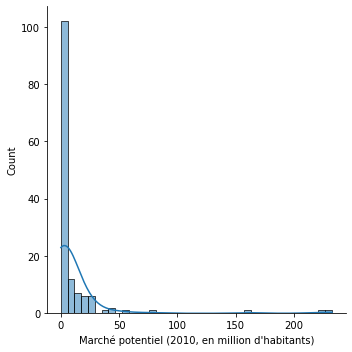

In [220]:
sns.displot(df_dataCleanedFinal["Marché potentiel (2010, en million d'habitants)"], kde=True,bins=40)
plt.show()

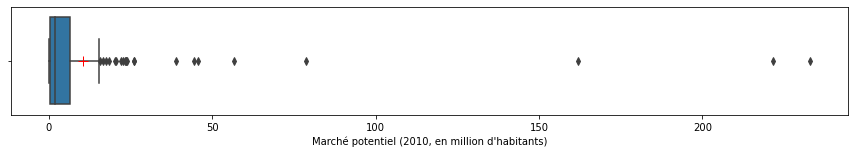

In [377]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df_dataCleanedFinal["Marché potentiel (2010, en million d'habitants)"], showmeans=True, meanprops={"marker": "+", "markeredgecolor": "red", "markersize": "10"})
plt.show()

In [224]:
max_market=df_dataCleanedFinal[df_dataCleanedFinal["Marché potentiel (2010, en million d'habitants)"].isin(df_dataCleanedFinal["Marché potentiel (2010, en million d'habitants)"].nlargest(15))]

In [225]:
max_market.sort_values("Marché potentiel (2010, en million d'habitants)",ascending=False,inplace=True)

C:\Users\bmeur\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


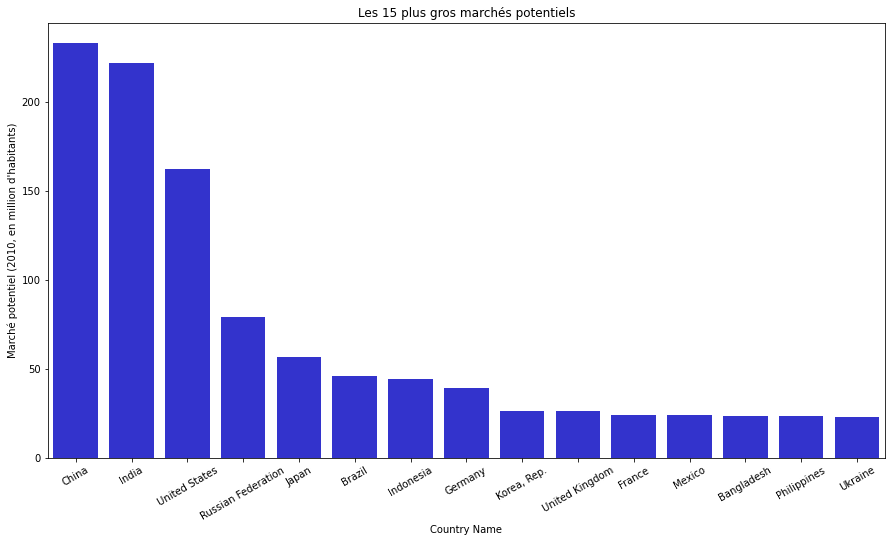

In [355]:
plt.figure(figsize = (15,8))
g=sns.barplot(x='Country Name',y="Marché potentiel (2010, en million d'habitants)",data=max_market,color='blue',saturation=0.6)
g.set_xticklabels(g.get_xticklabels(),rotation = 30)
g.set_title('Les 15 plus gros marchés potentiels')
plt.show()

In [368]:
pd.set_option('display.float_format',  '{:,.1f}'.format)

max_market.loc[:,['Country Name',"Marché potentiel (2010, en million d'habitants)"]]

,Country Name,"Marché potentiel (2010, en million d'habitants)"
24,China,232.8
54,India,221.6
134,United States,162.0
106,Russian Federation,78.8
62,Japan,56.9
15,Brazil,45.8
55,Indonesia,44.4
44,Germany,39.0
66,"Korea, Rep.",26.2
133,United Kingdom,26.0


In [370]:
pd.reset_option('display.float_format')

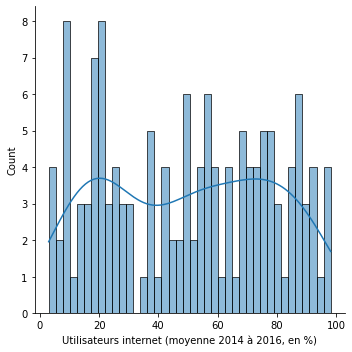

In [230]:
sns.displot(df_dataCleanedFinal["Utilisateurs internet (moyenne 2014 à 2016, en %)"],kde=True,bins=40)
plt.show()

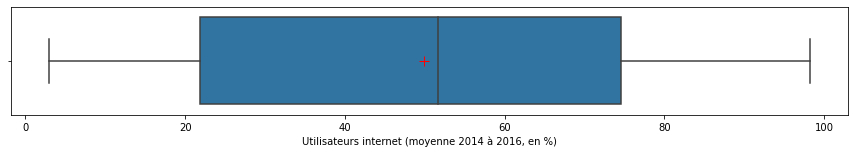

In [378]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df_dataCleanedFinal["Utilisateurs internet (moyenne 2014 à 2016, en %)"], showmeans=True, meanprops={"marker": "+", "markeredgecolor": "red", "markersize": "10"})
plt.show()

In [236]:
max_internet_users=df_dataCleanedFinal[df_dataCleanedFinal["Utilisateurs internet (moyenne 2014 à 2016, en %)"].isin(df_dataCleanedFinal["Utilisateurs internet (moyenne 2014 à 2016, en %)"].nlargest(15))]

In [237]:
max_internet_users.sort_values("Utilisateurs internet (moyenne 2014 à 2016, en %)",ascending=False,inplace=True)

C:\Users\bmeur\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


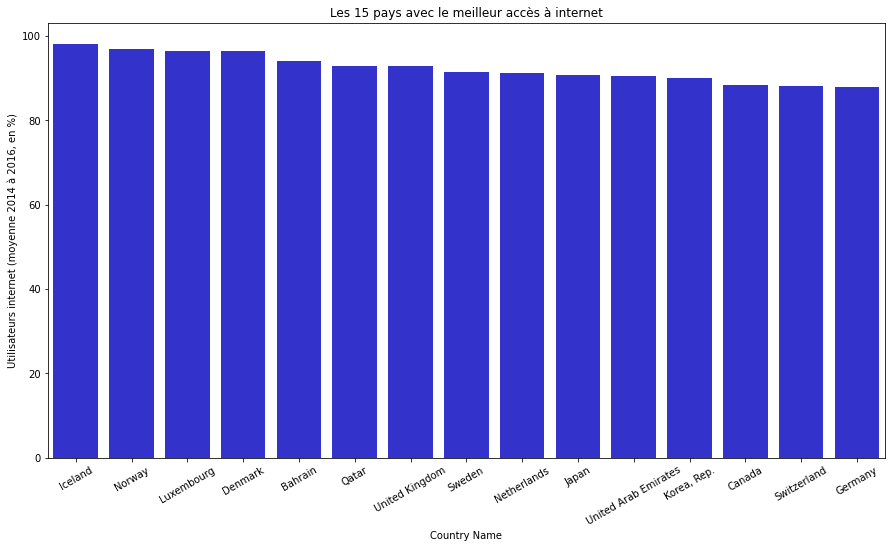

In [373]:
plt.figure(figsize = (15,8))
g=sns.barplot(x='Country Name',y="Utilisateurs internet (moyenne 2014 à 2016, en %)",data=max_internet_users,color='blue',saturation=0.6)
g.set_xticklabels(g.get_xticklabels(),rotation = 30)
g.set_title('Les 15 pays avec le meilleur accès à internet')
plt.show()

In [371]:
pd.set_option('display.float_format',  '{:,.1f}'.format)

max_internet_users.loc[:,['Country Name',"Utilisateurs internet (moyenne 2014 à 2016, en %)"]]

,Country Name,"Utilisateurs internet (moyenne 2014 à 2016, en %)"
53,Iceland,98.2
95,Norway,96.8
74,Luxembourg,96.5
33,Denmark,96.4
7,Bahrain,94.0
104,Qatar,92.9
133,United Kingdom,92.8
120,Sweden,91.5
91,Netherlands,91.3
62,Japan,90.7


In [372]:
pd.reset_option('display.float_format')

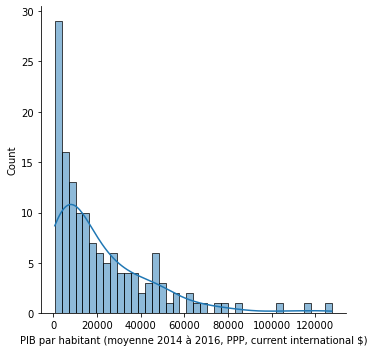

In [240]:
sns.displot(df_dataCleanedFinal["PIB par habitant (moyenne 2014 à 2016, PPP, current international $)"],kde=True,bins=40)
plt.show()

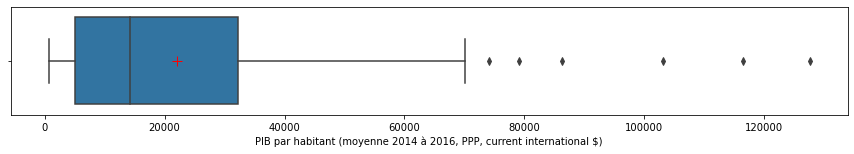

In [379]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df_dataCleanedFinal["PIB par habitant (moyenne 2014 à 2016, PPP, current international $)"],showmeans=True, meanprops={"marker": "+", "markeredgecolor": "red", "markersize": "10"})
plt.show()

In [242]:
max_gdp=df_dataCleanedFinal[df_dataCleanedFinal["PIB par habitant (moyenne 2014 à 2016, PPP, current international $)"].isin(df_dataCleanedFinal["PIB par habitant (moyenne 2014 à 2016, PPP, current international $)"].nlargest(15))]

In [243]:
max_gdp.sort_values("PIB par habitant (moyenne 2014 à 2016, PPP, current international $)",ascending=False,inplace=True)

C:\Users\bmeur\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


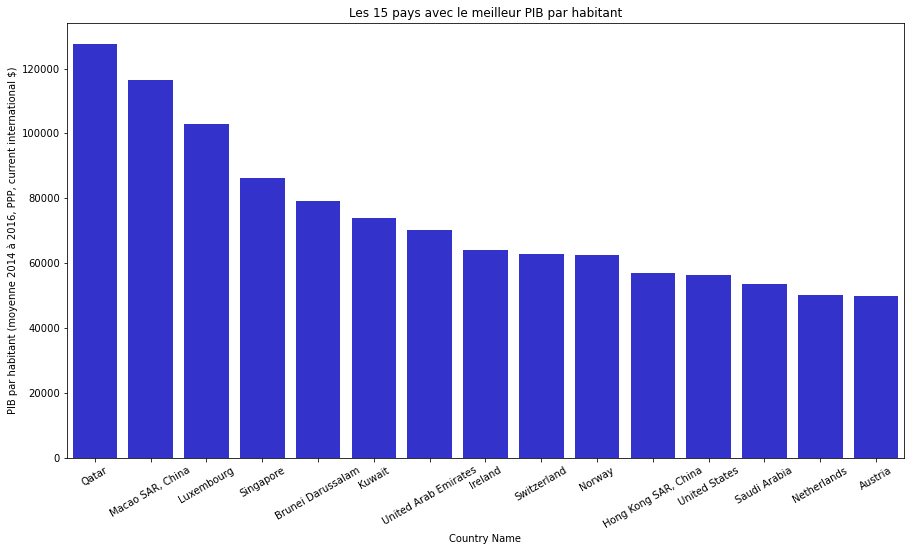

In [380]:
plt.figure(figsize = (15,8))
g=sns.barplot(x='Country Name',y="PIB par habitant (moyenne 2014 à 2016, PPP, current international $)",data=max_gdp,color='blue',saturation=0.6)
g.set_xticklabels(g.get_xticklabels(),rotation = 30)
g.set_title('Les 15 pays avec le meilleur PIB par habitant')
plt.show()

In [382]:
pd.set_option('display.float_format',  '{:,.1f}'.format)

max_gdp.loc[:,['Country Name',"PIB par habitant (moyenne 2014 à 2016, PPP, current international $)"]]

,Country Name,"PIB par habitant (moyenne 2014 à 2016, PPP, current international $)"
104,Qatar,"127,602.0"
75,"Macao SAR, China","116,442.1"
74,Luxembourg,"103,055.3"
112,Singapore,"86,300.9"
16,Brunei Darussalam,"79,105.4"
67,Kuwait,"74,027.2"
132,United Arab Emirates,"70,160.8"
58,Ireland,"64,221.2"
121,Switzerland,"62,941.8"
95,Norway,"62,412.9"


In [383]:
pd.reset_option('display.float_format')

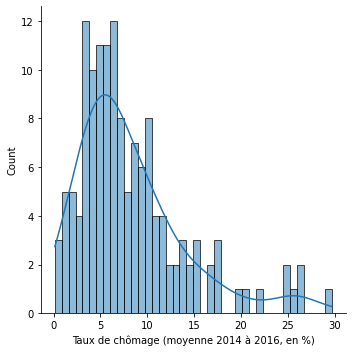

In [246]:
sns.displot(df_dataCleanedFinal["Taux de chômage (moyenne 2014 à 2016, en %)"],kde=True,bins=40)
plt.show()

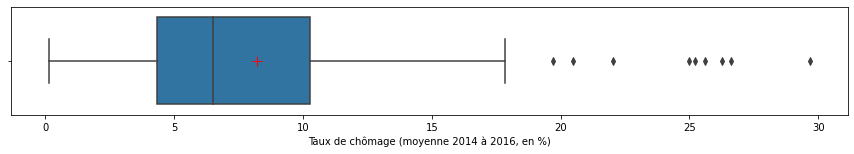

In [385]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df_dataCleanedFinal["Taux de chômage (moyenne 2014 à 2016, en %)"],showmeans=True, meanprops={"marker": "+", "markeredgecolor": "red", "markersize": "10"})
plt.show()

In [245]:
max_unemployed=df_dataCleanedFinal[df_dataCleanedFinal["Taux de chômage (moyenne 2014 à 2016, en %)"].isin(df_dataCleanedFinal["Taux de chômage (moyenne 2014 à 2016, en %)"].nlargest(15))]

In [248]:
max_unemployed.sort_values("Taux de chômage (moyenne 2014 à 2016, en %)",ascending=False,inplace=True)

C:\Users\bmeur\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


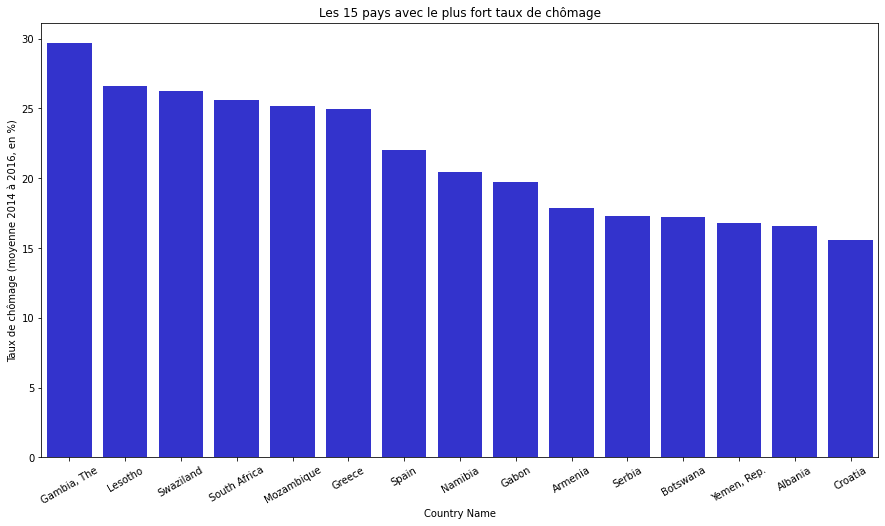

In [387]:
plt.figure(figsize = (15,8))
g=sns.barplot(x='Country Name',y="Taux de chômage (moyenne 2014 à 2016, en %)",data=max_unemployed,color='blue',saturation=0.6)
g.set_xticklabels(g.get_xticklabels(),rotation = 30)
g.set_title('Les 15 pays avec le plus fort taux de chômage')
plt.show()

In [389]:
pd.set_option('display.float_format',  '{:,.1f}'.format)

max_unemployed.loc[:,['Country Name',"Taux de chômage (moyenne 2014 à 2016, en %)"]]

,Country Name,"Taux de chômage (moyenne 2014 à 2016, en %)"
43,"Gambia, The",29.7
71,Lesotho,26.6
119,Swaziland,26.3
115,South Africa,25.6
87,Mozambique,25.2
46,Greece,25.0
116,Spain,22.0
89,Namibia,20.5
42,Gabon,19.7
4,Armenia,17.8


In [390]:
pd.reset_option('display.float_format')

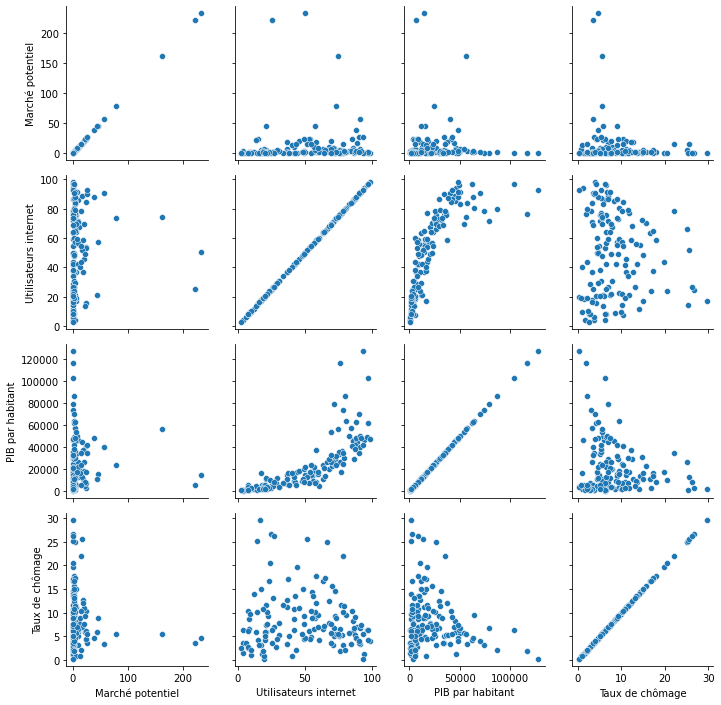

In [282]:
df_forGraph = pd.DataFrame({"Marché potentiel" : df_dataCleanedFinal["Marché potentiel (2010, en million d'habitants)"],
                           "Utilisateurs internet" : df_dataCleanedFinal["Utilisateurs internet (moyenne 2014 à 2016, en %)"],
                           "PIB par habitant" : df_dataCleanedFinal["PIB par habitant (moyenne 2014 à 2016, PPP, current international $)"],
                           "Taux de chômage" : df_dataCleanedFinal["Taux de chômage (moyenne 2014 à 2016, en %)"],
                           "Income Group" : df_dataCleanedFinal["Income Group"]})

g=sns.PairGrid(df_forGraph.loc[:,"Marché potentiel":"Taux de chômage"])
g.map(sns.scatterplot)
plt.show()

Text(0.5, 1.0, 'Corrélation entre PIB et utilisateurs internet')

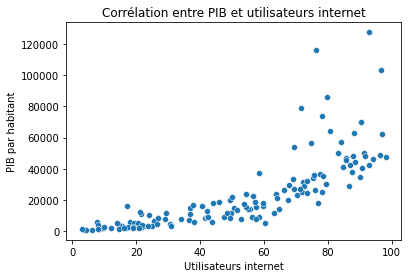

In [567]:
sns.scatterplot(x=df_forGraph['Utilisateurs internet'], y=df_forGraph['PIB par habitant'])
plt.title('Corrélation entre PIB et utilisateurs internet')

<AxesSubplot:>

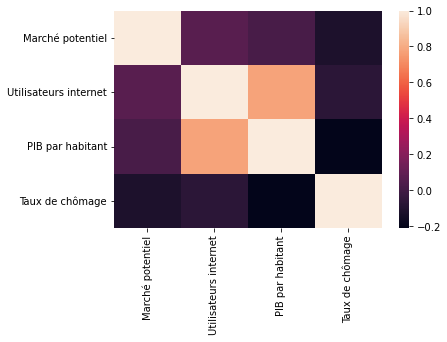

In [284]:
sns.heatmap(df_forGraph.loc[:,"Marché potentiel":"Taux de chômage"].corr())

-------->> On peut remarquer que les deux indicateurs les plus corrélés sont le nombre d'utilisateurs internet et le PIB par habitant d'un pays. Ce que peut sembler logique, plus un pays est développé, plus il possède de bonnes infrastructures pour l'accès à internet et plus le nombre d'habitants y ayant accès est important.

-------->> Analysons la corrélation entre le PIB par habitant et l''income group' d'un pays.

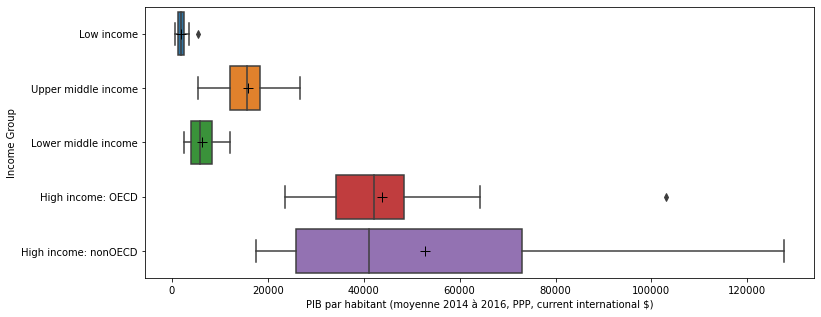

In [281]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df_dataCleanedFinal["PIB par habitant (moyenne 2014 à 2016, PPP, current international $)"],y=df_dataCleanedFinal["Income Group"],
            showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
plt.show()

-------->> On retrouve bien une corrélation entre le PIB par habitant et l''income group' d'un pays.

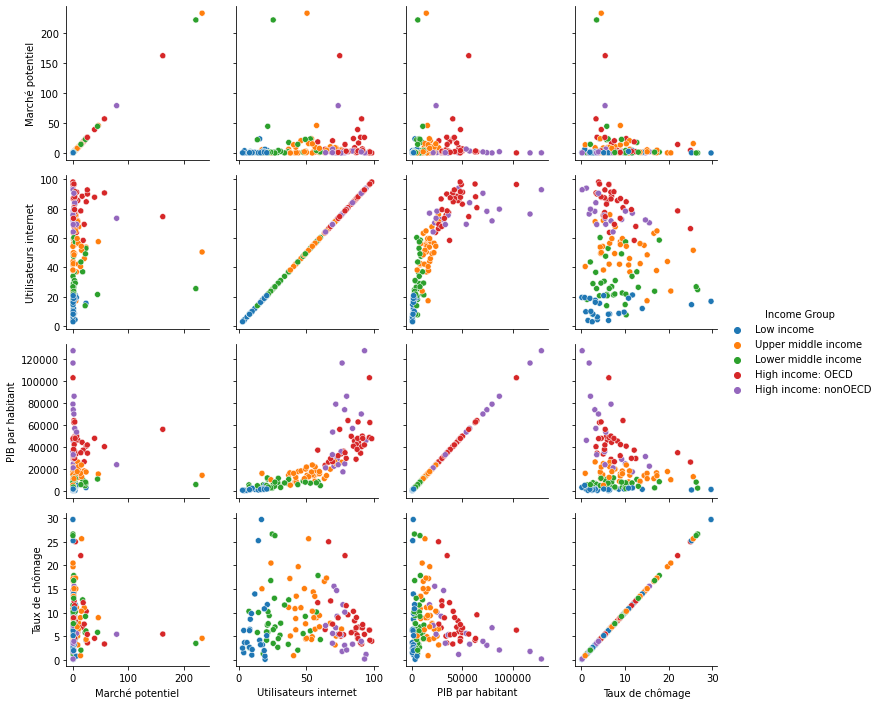

In [286]:
g=sns.PairGrid(df_forGraph,hue='Income Group')
g.map(sns.scatterplot)
g.add_legend()
plt.show()

# <a name="C15">Partie 5 : Mise en place d'un système de scores pour classer les pays</a>

-------->> On ramène tous les indicateurs entre 0 et 1.

In [288]:
df_dataCleanedFinal['Score marché']=df_dataCleanedFinal["Marché potentiel (2010, en million d'habitants)"]/df_dataCleanedFinal["Marché potentiel (2010, en million d'habitants)"].max()
df_dataCleanedFinal['Score utilisateurs internet']=df_dataCleanedFinal["Utilisateurs internet (moyenne 2014 à 2016, en %)"]/100
df_dataCleanedFinal['Score PIB']=df_dataCleanedFinal["PIB par habitant (moyenne 2014 à 2016, PPP, current international $)"]/df_dataCleanedFinal["PIB par habitant (moyenne 2014 à 2016, PPP, current international $)"].max()
df_dataCleanedFinal['Score chômage']=df_dataCleanedFinal["Taux de chômage (moyenne 2014 à 2016, en %)"]/df_dataCleanedFinal["Taux de chômage (moyenne 2014 à 2016, en %)"].max()
                                                                       

In [289]:
df_dataCleanedFinal.head()

,Country Name,Country Code,"Population in thousands, age 20-59, with completed secondary schooling","Population in thousands, age 20-59, with completed or incompleted tertiary schooling","Population in thousands, age 20-44, with completed secondary schooling","Population in thousands, age 20-44, with completed or incompleted tertiary schooling","Population in thousands, age 45-59, with completed secondary schooling","Population in thousands, age 45-59, with completed or incompleted tertiary schooling","Marché potentiel (2010, en million d'habitants)","Utilisateurs internet (moyenne 2014 à 2016, en %)","PIB par habitant (moyenne 2014 à 2016, PPP, current international $)","Taux de chômage (moyenne 2014 à 2016, en %)",Region,Income Group,Score marché,Score utilisateurs internet,Score PIB,Score chômage
0,Afghanistan,AFG,1214.0539,1216.0733,1146.0942,973.8825,67.9597,242.1908,2.430127,8.618575,1873.372186,8.600000,South Asia,Low income,0.010438,0.086186,0.014681,0.289888
1,Albania,ALB,829.7384,40.9199,556.0686,36.9779,273.6698,3.9420,0.870658,63.238792,11549.034176,16.600000,Europe & Central Asia,Upper middle income,0.003740,0.632388,0.090508,0.559551
2,Algeria,DZA,3539.6488,2759.9439,3039.9868,2472.0663,499.6620,287.8776,6.299593,36.881842,14629.692533,11.100000,Middle East & North Africa,Upper middle income,0.027057,0.368818,0.114651,0.374157
3,Argentina,ARG,7727.9702,2727.3776,6123.1827,1844.6524,1604.7875,882.7252,10.455348,67.631276,20053.226647,7.766667,Latin America & Caribbean,Upper middle income,0.044907,0.676313,0.157155,0.261798
4,Armenia,ARM,1081.3610,477.3069,642.2442,337.4501,439.1168,139.8568,1.558668,58.575061,8663.718307,17.833333,Europe & Central Asia,Lower middle income,0.006695,0.585751,0.067896,0.601124


-------->> On crée un score total dans lequel on applique des poids selon l'importance des indicateurs (possibilité ensuite d'ajuster les poids suivant les décisions au sein de l'entreprise).

In [290]:
poids_market = 50
poids_PIB = 20
poids_internet = 20
poids_chomage = 10

df_dataCleanedFinal['Score total']=(poids_market*df_dataCleanedFinal['Score marché']+poids_PIB*df_dataCleanedFinal['Score PIB']+poids_internet*df_dataCleanedFinal['Score utilisateurs internet']+poids_chomage*df_dataCleanedFinal['Score chômage'])/100

In [291]:
df_dataCleanedFinal.head()

,Country Name,Country Code,"Population in thousands, age 20-59, with completed secondary schooling","Population in thousands, age 20-59, with completed or incompleted tertiary schooling","Population in thousands, age 20-44, with completed secondary schooling","Population in thousands, age 20-44, with completed or incompleted tertiary schooling","Population in thousands, age 45-59, with completed secondary schooling","Population in thousands, age 45-59, with completed or incompleted tertiary schooling","Marché potentiel (2010, en million d'habitants)","Utilisateurs internet (moyenne 2014 à 2016, en %)","PIB par habitant (moyenne 2014 à 2016, PPP, current international $)","Taux de chômage (moyenne 2014 à 2016, en %)",Region,Income Group,Score marché,Score utilisateurs internet,Score PIB,Score chômage,Score total
0,Afghanistan,AFG,1214.0539,1216.0733,1146.0942,973.8825,67.9597,242.1908,2.430127,8.618575,1873.372186,8.600000,South Asia,Low income,0.010438,0.086186,0.014681,0.289888,0.054381
1,Albania,ALB,829.7384,40.9199,556.0686,36.9779,273.6698,3.9420,0.870658,63.238792,11549.034176,16.600000,Europe & Central Asia,Upper middle income,0.003740,0.632388,0.090508,0.559551,0.202404
2,Algeria,DZA,3539.6488,2759.9439,3039.9868,2472.0663,499.6620,287.8776,6.299593,36.881842,14629.692533,11.100000,Middle East & North Africa,Upper middle income,0.027057,0.368818,0.114651,0.374157,0.147638
3,Argentina,ARG,7727.9702,2727.3776,6123.1827,1844.6524,1604.7875,882.7252,10.455348,67.631276,20053.226647,7.766667,Latin America & Caribbean,Upper middle income,0.044907,0.676313,0.157155,0.261798,0.215327
4,Armenia,ARM,1081.3610,477.3069,642.2442,337.4501,439.1168,139.8568,1.558668,58.575061,8663.718307,17.833333,Europe & Central Asia,Lower middle income,0.006695,0.585751,0.067896,0.601124,0.194189


-------->> On regarde ensuite les 15 pays avec les meilleurs scores.

In [292]:
max_scoreTotal=df_dataCleanedFinal[df_dataCleanedFinal["Score total"].isin(df_dataCleanedFinal["Score total"].nlargest(15))]

In [293]:
max_scoreTotal.sort_values("Score total",ascending=False,inplace=True)

C:\Users\bmeur\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [294]:
max_scoreTotal

,Country Name,Country Code,"Population in thousands, age 20-59, with completed secondary schooling","Population in thousands, age 20-59, with completed or incompleted tertiary schooling","Population in thousands, age 20-44, with completed secondary schooling","Population in thousands, age 20-44, with completed or incompleted tertiary schooling","Population in thousands, age 45-59, with completed secondary schooling","Population in thousands, age 45-59, with completed or incompleted tertiary schooling","Marché potentiel (2010, en million d'habitants)","Utilisateurs internet (moyenne 2014 à 2016, en %)","PIB par habitant (moyenne 2014 à 2016, PPP, current international $)","Taux de chômage (moyenne 2014 à 2016, en %)",Region,Income Group,Score marché,Score utilisateurs internet,Score PIB,Score chômage,Score total
24,China,CHN,190182.3283,42641.2847,141370.4731,37974.2288,48811.8552,4667.0559,232.823613,50.466667,14492.428535,4.566667,East Asia & Pacific,Upper middle income,1.000000,0.504667,0.113575,0.153933,0.639042
134,United States,USA,59019.2357,102983.5914,35169.1285,65798.7634,23850.1072,37184.8280,162.002827,74.576980,56235.239582,5.466667,North America,High income: OECD,0.695818,0.745770,0.440708,0.184270,0.603631
54,India,IND,158509.9600,63054.4379,132774.3118,49631.8235,25735.6482,13422.6144,221.564398,25.515721,6133.422988,3.500000,South Asia,Lower middle income,0.951641,0.255157,0.048067,0.117978,0.548263
104,Qatar,QAT,143.2620,111.9002,107.4420,79.5272,35.8200,32.3730,0.255162,92.888648,127601.974078,0.200000,Middle East & North Africa,High income: nonOECD,0.001096,0.928886,1.000000,0.006742,0.386999
62,Japan,JPN,27935.2890,28914.7718,16780.6092,20386.0945,11154.6798,8528.6773,56.850061,90.721620,40516.431167,3.366667,East Asia & Pacific,High income: OECD,0.244177,0.907216,0.317522,0.113483,0.378384
74,Luxembourg,LUX,88.6186,95.2777,58.4011,66.9197,30.2175,28.3580,0.183896,96.499343,103055.320154,6.300000,Europe & Central Asia,High income: OECD,0.000790,0.964993,0.807631,0.212360,0.376156
106,Russian Federation,RUS,20842.3736,57981.6733,12171.6859,37302.9212,8670.6877,20678.7521,78.824047,73.446362,24114.236816,5.433333,Europe & Central Asia,High income: nonOECD,0.338557,0.734464,0.188980,0.183146,0.372282
44,Germany,DEU,27841.3843,11179.1184,16617.3558,6216.4727,11224.0285,4962.6457,39.020503,87.808967,48083.543095,4.566667,Europe & Central Asia,High income: OECD,0.167597,0.878090,0.376824,0.153933,0.350175
75,"Macao SAR, China",MAC,106.2508,60.0864,73.4779,50.0537,32.7729,10.0327,0.166337,76.341039,116442.081903,1.800000,East Asia & Pacific,High income: nonOECD,0.000714,0.763410,0.912541,0.060674,0.341615
133,United Kingdom,GBR,16045.7515,9938.6121,10521.8530,6778.8675,5523.8985,3159.7446,25.984364,92.795367,42080.175815,5.400000,Europe & Central Asia,High income: OECD,0.111605,0.927954,0.329777,0.182022,0.325551


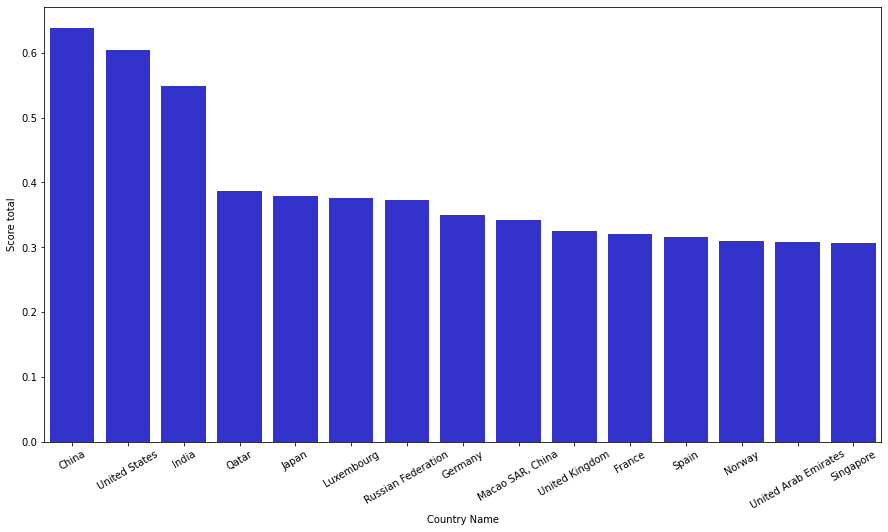

In [295]:
plt.figure(figsize = (15,8))
g=sns.barplot(x='Country Name',y="Score total",data=max_scoreTotal,color='blue',saturation=0.6)
g.set_xticklabels(g.get_xticklabels(),rotation = 30)
plt.show()

-------->> On remarque que le 'Qatar', 'Luxembourg', 'Macao' et 'Singapore' arrivent dans les premiers pays du fait de leur score PIB très important. Hors on peut supposer qu'il "suffit" juste d'avoir un niveau de revenu minimum pour qu'un pays soit intéressant pour l'implantation de l'entreprise.  

On décide donc de réajuster le score en ne prenant plus en compte le 'Score PIB' mais en prenant la variable 'Income Group' qui est correlé au PIB et pour laquelle on suppose qu'il faille être en 'Upper middle income' pour être un pays dans le classement.  

De plus on réajuste également le score marché en supposant que la catégorie d'âge 20-44 est plus importante que la catégorie 45-59 car on suppose qu'il y a potentiellement plus de personnes intéressées par, par exemple, une reconversion professionnelle entre 20-44 ans qu'entre 45-59.

In [296]:
poids_pop20_44 = 70
poids_pop45_59 = 30

df_dataCleanedFinal["Marché pondéré"]=(poids_pop20_44*(df_dataCleanedFinal["Population in thousands, age 20-44, with completed secondary schooling"]+df_dataCleanedFinal["Population in thousands, age 20-44, with completed or incompleted tertiary schooling"])+poids_pop45_59*(df_dataCleanedFinal["Population in thousands, age 45-59, with completed secondary schooling"]+df_dataCleanedFinal["Population in thousands, age 45-59, with completed or incompleted tertiary schooling"]))/100

In [297]:
df_dataCleanedFinal["Score marché pondéré"]=df_dataCleanedFinal["Marché pondéré"]/df_dataCleanedFinal["Marché pondéré"].max()

In [298]:
df_dataCleanedFinal.head()

,Country Name,Country Code,"Population in thousands, age 20-59, with completed secondary schooling","Population in thousands, age 20-59, with completed or incompleted tertiary schooling","Population in thousands, age 20-44, with completed secondary schooling","Population in thousands, age 20-44, with completed or incompleted tertiary schooling","Population in thousands, age 45-59, with completed secondary schooling","Population in thousands, age 45-59, with completed or incompleted tertiary schooling","Marché potentiel (2010, en million d'habitants)","Utilisateurs internet (moyenne 2014 à 2016, en %)","PIB par habitant (moyenne 2014 à 2016, PPP, current international $)","Taux de chômage (moyenne 2014 à 2016, en %)",Region,Income Group,Score marché,Score utilisateurs internet,Score PIB,Score chômage,Score total,Marché pondéré,Score marché pondéré
0,Afghanistan,AFG,1214.0539,1216.0733,1146.0942,973.8825,67.9597,242.1908,2.430127,8.618575,1873.372186,8.600000,South Asia,Low income,0.010438,0.086186,0.014681,0.289888,0.054381,1577.02884,0.011138
1,Albania,ALB,829.7384,40.9199,556.0686,36.9779,273.6698,3.9420,0.870658,63.238792,11549.034176,16.600000,Europe & Central Asia,Upper middle income,0.003740,0.632388,0.090508,0.559551,0.202404,498.41609,0.003520
2,Algeria,DZA,3539.6488,2759.9439,3039.9868,2472.0663,499.6620,287.8776,6.299593,36.881842,14629.692533,11.100000,Middle East & North Africa,Upper middle income,0.027057,0.368818,0.114651,0.374157,0.147638,4094.69905,0.028920
3,Argentina,ARG,7727.9702,2727.3776,6123.1827,1844.6524,1604.7875,882.7252,10.455348,67.631276,20053.226647,7.766667,Latin America & Caribbean,Upper middle income,0.044907,0.676313,0.157155,0.261798,0.215327,6323.73838,0.044664
4,Armenia,ARM,1081.3610,477.3069,642.2442,337.4501,439.1168,139.8568,1.558668,58.575061,8663.718307,17.833333,Europe & Central Asia,Lower middle income,0.006695,0.585751,0.067896,0.601124,0.194189,859.47809,0.006070


<AxesSubplot:xlabel='Score marché', ylabel='Score marché pondéré'>

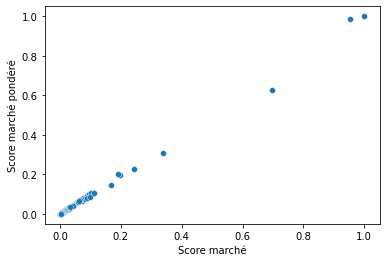

In [299]:
sns.scatterplot(data=df_dataCleanedFinal, x="Score marché", y="Score marché pondéré")

-------->> On remarque que ce nouveau score marché pondéré ne quasiment pas les valeurs du score marché non pondéré.

In [300]:
poids_market_2 = 60
poids_internet_2 = 25
poids_chomage_2 = 15

df_dataCleanedFinal["Score total_2"]=(poids_market_2*df_dataCleanedFinal["Score marché pondéré"]+poids_internet_2*df_dataCleanedFinal["Score utilisateurs internet"]+poids_chomage_2*df_dataCleanedFinal["Score chômage"])/100

In [301]:
max_scoreTotal_2=df_dataCleanedFinal[df_dataCleanedFinal["Income Group"].isin(['Upper middle income','High income: OECD','High income: nonOECD'])]

In [302]:
max_scoreTotal_2=max_scoreTotal_2[max_scoreTotal_2["Score total_2"].isin(max_scoreTotal_2["Score total_2"].nlargest(15))]

In [303]:
max_scoreTotal_2.sort_values("Score total_2",ascending=False,inplace=True)

In [304]:
max_scoreTotal_2

,Country Name,Country Code,"Population in thousands, age 20-59, with completed secondary schooling","Population in thousands, age 20-59, with completed or incompleted tertiary schooling","Population in thousands, age 20-44, with completed secondary schooling","Population in thousands, age 20-44, with completed or incompleted tertiary schooling","Population in thousands, age 45-59, with completed secondary schooling","Population in thousands, age 45-59, with completed or incompleted tertiary schooling","Marché potentiel (2010, en million d'habitants)","Utilisateurs internet (moyenne 2014 à 2016, en %)","PIB par habitant (moyenne 2014 à 2016, PPP, current international $)","Taux de chômage (moyenne 2014 à 2016, en %)",Region,Income Group,Score marché,Score utilisateurs internet,Score PIB,Score chômage,Score total,Marché pondéré,Score marché pondéré,Score total_2
24,China,CHN,190182.3283,42641.2847,141370.4731,37974.2288,48811.8552,4667.0559,232.823613,50.466667,14492.428535,4.566667,East Asia & Pacific,Upper middle income,1.000000,0.504667,0.113575,0.153933,0.639042,141584.96466,1.000000,0.749257
134,United States,USA,59019.2357,102983.5914,35169.1285,65798.7634,23850.1072,37184.8280,162.002827,74.576980,56235.239582,5.466667,North America,High income: OECD,0.695818,0.745770,0.440708,0.184270,0.603631,88988.00489,0.628513,0.591191
106,Russian Federation,RUS,20842.3736,57981.6733,12171.6859,37302.9212,8670.6877,20678.7521,78.824047,73.446362,24114.236816,5.433333,Europe & Central Asia,High income: nonOECD,0.338557,0.734464,0.188980,0.183146,0.372282,43437.05691,0.306791,0.395163
62,Japan,JPN,27935.2890,28914.7718,16780.6092,20386.0945,11154.6798,8528.6773,56.850061,90.721620,40516.431167,3.366667,East Asia & Pacific,High income: OECD,0.244177,0.907216,0.317522,0.113483,0.378384,31921.69972,0.225460,0.379102
116,Spain,ESP,6297.2727,7882.9849,4511.8899,5832.2638,1785.3828,2050.7211,14.180258,78.480311,34994.340570,22.033333,Europe & Central Asia,High income: OECD,0.060906,0.784803,0.274246,0.742697,0.316532,8391.73876,0.059270,0.343167
44,Germany,DEU,27841.3843,11179.1184,16617.3558,6216.4727,11224.0285,4962.6457,39.020503,87.808967,48083.543095,4.566667,Europe & Central Asia,High income: OECD,0.167597,0.878090,0.376824,0.153933,0.350175,20839.68221,0.147189,0.330925
133,United Kingdom,GBR,16045.7515,9938.6121,10521.8530,6778.8675,5523.8985,3159.7446,25.984364,92.795367,42080.175815,5.400000,Europe & Central Asia,High income: OECD,0.111605,0.927954,0.329777,0.182022,0.325551,14715.59728,0.103935,0.321653
41,France,FRA,14307.1204,9713.1503,8955.4537,7120.7849,5351.6667,2592.3654,24.020271,84.688900,40955.264317,10.266667,Europe & Central Asia,High income: OECD,0.103169,0.846889,0.320961,0.346067,0.319761,13636.57665,0.096314,0.321421
15,Brazil,BRA,33578.1316,12194.5321,27559.2744,8678.0675,6018.8572,3516.4646,45.772664,57.520567,15664.198085,8.933333,Latin America & Caribbean,Upper middle income,0.196598,0.575206,0.122758,0.301124,0.268004,28226.73587,0.199363,0.308587
66,"Korea, Rep.",KOR,10708.1889,15500.7535,5992.1343,12515.2619,4716.0546,2985.4916,26.208942,89.974001,34601.299479,3.600000,East Asia & Pacific,High income: OECD,0.112570,0.899740,0.271166,0.121348,0.302601,15265.64120,0.107820,0.307829


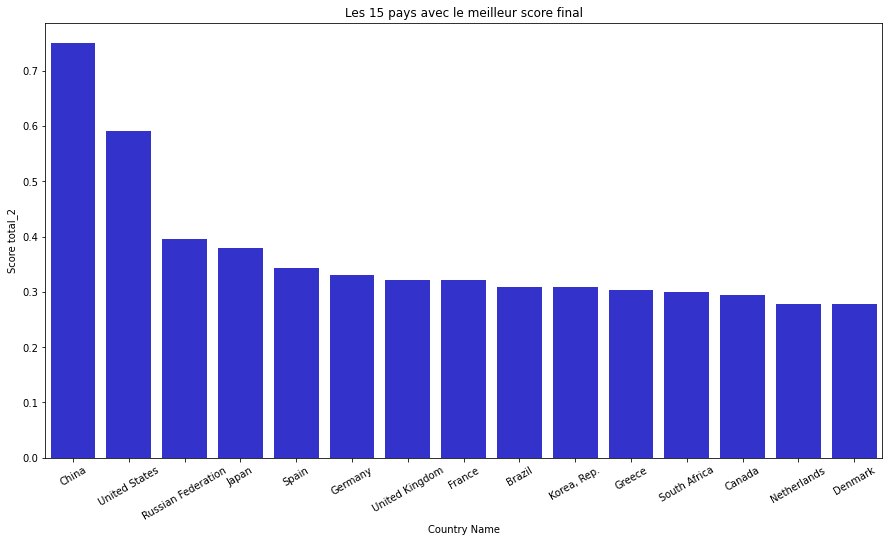

In [392]:
plt.figure(figsize = (15,8))
g=sns.barplot(x='Country Name',y="Score total_2",data=max_scoreTotal_2,color='blue',saturation=0.6)
g.set_xticklabels(g.get_xticklabels(),rotation = 30)
g.set_title('Les 15 pays avec le meilleur score final')
plt.show()

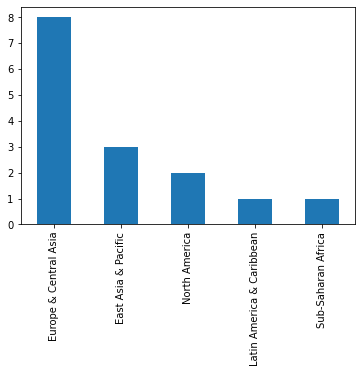

In [306]:
max_scoreTotal_2["Region"].value_counts().plot(kind='bar')
plt.show()

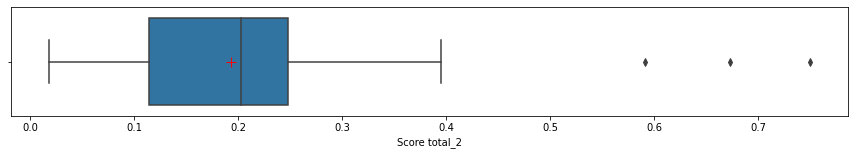

In [568]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df_dataCleanedFinal["Score total_2"],showmeans=True, meanprops={"marker": "+", "markeredgecolor": "red", "markersize": "10"})
plt.show()

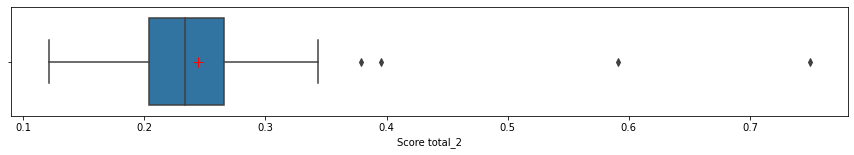

In [569]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df_dataCleanedFinal[df_dataCleanedFinal["Income Group"].isin(['Upper middle income','High income: OECD','High income: nonOECD'])]["Score total_2"],showmeans=True, meanprops={"marker": "+", "markeredgecolor": "red", "markersize": "10"})
plt.show()

In [570]:
df_dataCleanedFinal[df_dataCleanedFinal["Income Group"].isin(['Upper middle income','High income: OECD','High income: nonOECD'])]["Score total_2"].describe()

count    84.000000
mean      0.244757
std       0.085892
min       0.121161
25%       0.204282
50%       0.233947
75%       0.265533
max       0.749257
Name: Score total_2, dtype: float64

In [586]:
pd.set_option('display.float_format',  '{:,.2f}'.format)

max_scoreTotal_2.loc[:,['Country Name', 'Score total_2']]

,Country Name,Score total_2
24,China,0.75
134,United States,0.59
106,Russian Federation,0.40
62,Japan,0.38
116,Spain,0.34
44,Germany,0.33
133,United Kingdom,0.32
41,France,0.32
15,Brazil,0.31
66,"Korea, Rep.",0.31


In [393]:
pd.pivot_table(max_scoreTotal_2,index=['Region','Country Name'],values=['Score total_2'])

Score total_2
Region                    Country Name                     
East Asia & Pacific       China                        0.75
                          Japan                        0.38
                          Korea, Rep.                  0.31
Europe & Central Asia     Denmark                      0.28
                          France                       0.32
                          Germany                      0.33
                          Greece                       0.30
                          Netherlands                  0.28
                          Russian Federation           0.40
                          Spain                        0.34
                          United Kingdom               0.32
Latin America & Caribbean Brazil                       0.31
North America             Canada                       0.29
                          United States                0.59
Sub-Saharan Africa        South Africa                 0.30

In [394]:
pd.reset_option('display.float_format')

In [312]:
df_dataCleanedFinal[df_dataCleanedFinal['Country Name']=='India']

,Country Name,Country Code,"Population in thousands, age 20-59, with completed secondary schooling","Population in thousands, age 20-59, with completed or incompleted tertiary schooling","Population in thousands, age 20-44, with completed secondary schooling","Population in thousands, age 20-44, with completed or incompleted tertiary schooling","Population in thousands, age 45-59, with completed secondary schooling","Population in thousands, age 45-59, with completed or incompleted tertiary schooling","Marché potentiel (2010, en million d'habitants)","Utilisateurs internet (moyenne 2014 à 2016, en %)","PIB par habitant (moyenne 2014 à 2016, PPP, current international $)","Taux de chômage (moyenne 2014 à 2016, en %)",Region,Income Group,Score marché,Score utilisateurs internet,Score PIB,Score chômage,Score total,Marché pondéré,Score marché pondéré,Score total_2
54,India,IND,158509.96,63054.4379,132774.3118,49631.8235,25735.6482,13422.6144,221.564398,25.515721,6133.422988,3.5,South Asia,Lower middle income,0.951641,0.255157,0.048067,0.117978,0.548263,139431.77349,0.984792,0.672361


In [315]:
df_dataCleanedFinal["Country Name & Income Group"]=df_dataCleanedFinal["Country Name"]+" | "+df_dataCleanedFinal["Income Group"]

In [316]:
df_dataCleanedFinal.sort_values("Score total_2", ascending=False, inplace=True)

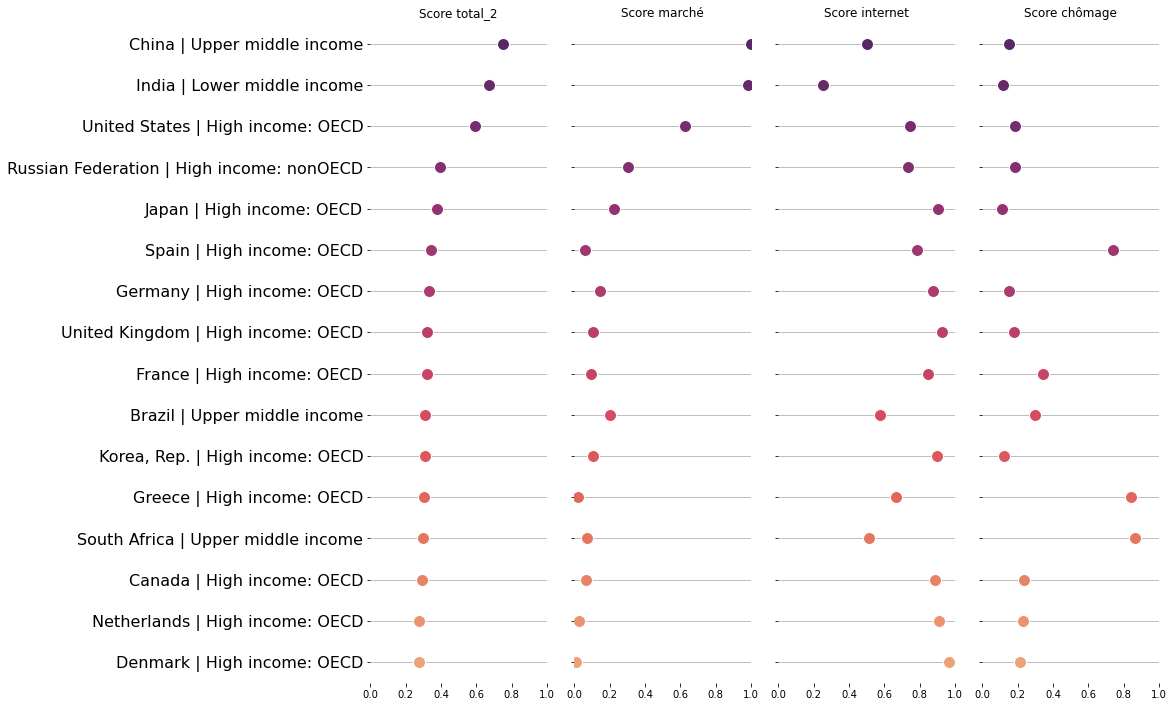

In [592]:
g = sns.PairGrid(df_dataCleanedFinal[df_dataCleanedFinal["Score total_2"].isin(df_dataCleanedFinal["Score total_2"].nlargest(16))],
                 x_vars=["Score total_2","Score marché pondéré","Score utilisateurs internet","Score chômage"], y_vars=["Country Name & Income Group"],
                 height=10, aspect=.3)

g.map(sns.stripplot, size=12, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

g.set(xlim=(0, 1), xlabel="", ylabel="")

titles = ["Score total_2", "Score marché", "Score internet",
          "Score chômage"]

for ax, title in zip(g.axes.flat, titles):

    ax.set(title=title)

    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    ax.yaxis.set_tick_params(labelsize = 16)

sns.despine(left=True, bottom=True)

-------->> On remarque que le pays avec un 'Score total_2' élevé mais qui "sort" du classement du fait de son 'income group' pas assez élevé par rapport au filtre effectué est l'Inde qui a un 'income group' égal à 'Lower middle income'.

# <a name="C16">Partie 6 : Analyse de l'évolution potentielle des marchés</a>

In [397]:
max_scoreTotal_2

,Country Name,Country Code,"Population in thousands, age 20-59, with completed secondary schooling","Population in thousands, age 20-59, with completed or incompleted tertiary schooling","Population in thousands, age 20-44, with completed secondary schooling","Population in thousands, age 20-44, with completed or incompleted tertiary schooling","Population in thousands, age 45-59, with completed secondary schooling","Population in thousands, age 45-59, with completed or incompleted tertiary schooling","Marché potentiel (2010, en million d'habitants)","Utilisateurs internet (moyenne 2014 à 2016, en %)","PIB par habitant (moyenne 2014 à 2016, PPP, current international $)","Taux de chômage (moyenne 2014 à 2016, en %)",Region,Income Group,Score marché,Score utilisateurs internet,Score PIB,Score chômage,Score total,Marché pondéré,Score marché pondéré,Score total_2
24,China,CHN,190182.3283,42641.2847,141370.4731,37974.2288,48811.8552,4667.0559,232.823613,50.466667,14492.428535,4.566667,East Asia & Pacific,Upper middle income,1.000000,0.504667,0.113575,0.153933,0.639042,141584.96466,1.000000,0.749257
134,United States,USA,59019.2357,102983.5914,35169.1285,65798.7634,23850.1072,37184.8280,162.002827,74.576980,56235.239582,5.466667,North America,High income: OECD,0.695818,0.745770,0.440708,0.184270,0.603631,88988.00489,0.628513,0.591191
106,Russian Federation,RUS,20842.3736,57981.6733,12171.6859,37302.9212,8670.6877,20678.7521,78.824047,73.446362,24114.236816,5.433333,Europe & Central Asia,High income: nonOECD,0.338557,0.734464,0.188980,0.183146,0.372282,43437.05691,0.306791,0.395163
62,Japan,JPN,27935.2890,28914.7718,16780.6092,20386.0945,11154.6798,8528.6773,56.850061,90.721620,40516.431167,3.366667,East Asia & Pacific,High income: OECD,0.244177,0.907216,0.317522,0.113483,0.378384,31921.69972,0.225460,0.379102
116,Spain,ESP,6297.2727,7882.9849,4511.8899,5832.2638,1785.3828,2050.7211,14.180258,78.480311,34994.340570,22.033333,Europe & Central Asia,High income: OECD,0.060906,0.784803,0.274246,0.742697,0.316532,8391.73876,0.059270,0.343167
44,Germany,DEU,27841.3843,11179.1184,16617.3558,6216.4727,11224.0285,4962.6457,39.020503,87.808967,48083.543095,4.566667,Europe & Central Asia,High income: OECD,0.167597,0.878090,0.376824,0.153933,0.350175,20839.68221,0.147189,0.330925
133,United Kingdom,GBR,16045.7515,9938.6121,10521.8530,6778.8675,5523.8985,3159.7446,25.984364,92.795367,42080.175815,5.400000,Europe & Central Asia,High income: OECD,0.111605,0.927954,0.329777,0.182022,0.325551,14715.59728,0.103935,0.321653
41,France,FRA,14307.1204,9713.1503,8955.4537,7120.7849,5351.6667,2592.3654,24.020271,84.688900,40955.264317,10.266667,Europe & Central Asia,High income: OECD,0.103169,0.846889,0.320961,0.346067,0.319761,13636.57665,0.096314,0.321421
15,Brazil,BRA,33578.1316,12194.5321,27559.2744,8678.0675,6018.8572,3516.4646,45.772664,57.520567,15664.198085,8.933333,Latin America & Caribbean,Upper middle income,0.196598,0.575206,0.122758,0.301124,0.268004,28226.73587,0.199363,0.308587
66,"Korea, Rep.",KOR,10708.1889,15500.7535,5992.1343,12515.2619,4716.0546,2985.4916,26.208942,89.974001,34601.299479,3.600000,East Asia & Pacific,High income: OECD,0.112570,0.899740,0.271166,0.121348,0.302601,15265.64120,0.107820,0.307829


In [483]:
df_projection = df_data[(df_data['Indicator Name'].isin(['Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total'
        ,'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total']))
        & df_data['Country Code'].isin(max_scoreTotal_2['Country Code'])]

In [484]:
df_projection.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
190565,Brazil,BRA,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13623.05,NaN,NaN,NaN,NaN,16004.70,NaN,NaN,18529.85,21283.16,24079.93,26772.12,29499.82,32299.24,35078.27,37766.03,40342.33,42794.29,45130.39,47282.88,49244.37,51055.19,52724.45,54245.31,55613.24,NaN
190571,Brazil,BRA,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38231.06,NaN,NaN,NaN,NaN,45157.00,NaN,NaN,52721.44,60076.72,66720.27,73298.80,79675.73,85479.76,90448.11,94568.43,97810.31,100080.28,101355.78,101666.22,101165.92,99916.82,98021.43,95600.03,92762.85,NaN
223550,Canada,CAN,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14138.12,NaN,NaN,NaN,NaN,15821.87,NaN,NaN,17454.25,18982.06,20510.98,22040.93,23583.44,25134.79,26649.54,28115.74,29562.62,30932.93,32229.56,33428.08,34479.43,35335.42,36018.34,36554.36,36968.37,NaN
223556,Canada,CAN,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10276.79,NaN,NaN,NaN,NaN,10693.52,NaN,NaN,10926.34,11270.35,11535.64,11763.91,11932.90,11968.05,11889.56,11799.24,11749.75,11697.83,11621.35,11483.84,11282.03,11030.77,10766.72,10505.45,10241.39,NaN
245540,China,CHN,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87715.74,NaN,NaN,NaN,NaN,107118.13,NaN,NaN,126496.96,145660.86,165561.25,184640.78,203381.68,221135.73,237643.28,252641.19,265880.80,277271.02,286891.69,294703.23,300708.37,305028.68,308026.92,310024.96,311167.32,NaN


In [485]:
df_projection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 190565 to 850271
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    30 non-null     object 
 1   Country Code    30 non-null     object 
 2   Indicator Name  30 non-null     object 
 3   Indicator Code  30 non-null     object 
 4   1970            0 non-null      float64
 5   1971            0 non-null      float64
 6   1972            0 non-null      float64
 7   1973            0 non-null      float64
 8   1974            0 non-null      float64
 9   1975            0 non-null      float64
 10  1976            0 non-null      float64
 11  1977            0 non-null      float64
 12  1978            0 non-null      float64
 13  1979            0 non-null      float64
 14  1980            0 non-null      float64
 15  1981            0 non-null      float64
 16  1982            0 non-null      float64
 17  1983            0 non-null  

In [486]:
df_projection = pd.pivot_table(df_projection, index=["Country Name", "Country Code"], columns=['Indicator Name'],
                               values=['2010', '2015', '2020', '2025', '2030', '2035', '2040', '2045', '2050'])

In [487]:
df_projection.head()

2010  \
Indicator Name            Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total   
Country Name Country Code                                                                                                                      
Brazil       BRA                                                    13623.05                                                                   
Canada       CAN                                                    14138.12                                                                   
China        CHN                                                    87715.74                                                                   
Denmark      DNK                                                     1001.52                                                                   
France       FRA                                                    11625.61                                                                   

                                                                                                                                               \
Indicator Name            Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total   
Country Name Country Code                                                                                                                       
Brazil       BRA                                                    38231.06                                                                    
Canada       CAN                                                    10276.79                                                                    
China        CHN                                                   174489.32                                                                    
Denmark      DNK                                                     1977.08                                                                    
France       FRA                                                    20791.59                                                                    

                                                                                                                                        2015  \
Indicator Name            Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total   
Country Name Country Code                                                                                                                      
Brazil       BRA                                                    16004.70                                                                   
Canada       CAN                                                    15821.87                                                                   
China        CHN                                                   107118.13                                                                   
Denmark      DNK                                                     1084.90                                                                   
France       FRA                                                    13539.27                                                                   

                                                                                                                                               \
Indicator Name            Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total   
Country Name Country Code                                                                                                                       
Brazil       BRA                                                    45157.00                                                                    
Canada       CAN                                                    10693.52             

In [488]:
# On crée un indicateur qui est la somme des valeurs pour 'upper secondary' et pour 'post secondary' pour chaque année. (Il n'y a pas de données sur le tertiary)

for i in range(2010,2051,5):
    df_projection[(str(i),'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary + Post Secondary. Total')]=df_projection[(str(i),'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total')] + df_projection[(str(i),'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total')]

In [489]:
df_projection

2010  \
Indicator Name                  Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total   
Country Name       Country Code                                                                                                                      
Brazil             BRA                                                    13623.05                                                                   
Canada             CAN                                                    14138.12                                                                   
China              CHN                                                    87715.74                                                                   
Denmark            DNK                                                     1001.52                                                                   
France             FRA                                                    11625.61                                                                   
Germany            DEU                                                    19311.89                                                                   
Greece             GRC                                                     1790.01                                                                   
Japan              JPN                                                    36339.45                                                                   
Korea, Rep.        KOR                                                    12692.83                                                                   
Netherlands        NLD                                                     3313.49                                                                   
Russian Federation RUS                                                    22958.54                                                                   
South Africa       ZAF                                                     1475.16                                                                   
Spain              ESP                                                     7207.07                                                                   
United Kingdom     GBR                                                    12502.92                                                                   
United States      USA                                                    78143.91                                                                   

                                                                                                                                                     \
Indicator Name                  Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total   
Country Name       Country Code                                                                                                                       
Brazil             BRA                                                    38231.06                                                                    
Canada             CAN                                                    10276.79                                                                    
China              CHN                                                   174489.32                                                                    
Denmark            DNK                                                     1977.08                                                                    
France             FRA                                                    20791.59                                                                    
Germany            DEU                                                    34883.13                                                                    
Greece             GRC                                                     3730.90

In [490]:
df_projection = df_projection.stack()

In [491]:
df_projection.reset_index(inplace=True)

In [492]:
df_projection = df_projection[df_projection['Indicator Name']=='Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary + Post Secondary. Total']

In [493]:
df_projection.shape

(15, 12)

In [494]:
df_projection.loc[:,'2010':'2050'] = df_projection.loc[:,'2010':'2050']/1000

In [495]:
df_projection

,Country Name,Country Code,Indicator Name,2010,2015,2020,2025,2030,2035,2040,2045,2050
1,Brazil,BRA,Wittgenstein Projection: Population in thousan...,51.85411,61.16170,71.25129,81.35988,90.80020,100.07092,109.17555,117.77900,125.52638
4,Canada,CAN,Wittgenstein Projection: Population in thousan...,24.41491,26.51539,28.38059,30.25241,32.04662,33.80484,35.51634,37.10284,38.53910
7,China,CHN,Wittgenstein Projection: Population in thousan...,262.20506,304.47338,344.36295,384.92732,421.89928,456.55640,487.44208,514.31263,537.26351
10,Denmark,DNK,Wittgenstein Projection: Population in thousan...,2.97860,3.21823,3.45672,3.67843,3.88697,4.06027,4.23892,4.43618,4.65081
13,France,FRA,Wittgenstein Projection: Population in thousan...,32.41720,35.58307,38.78533,42.03438,45.21677,48.23514,51.03440,53.60166,56.00445
16,Germany,DEU,Wittgenstein Projection: Population in thousan...,54.19502,55.80713,57.15613,58.07944,58.76678,59.21381,59.57381,59.81279,59.83104
19,Greece,GRC,Wittgenstein Projection: Population in thousan...,5.52091,6.03573,6.52520,7.03114,7.51433,7.93074,8.28345,8.57593,8.81849
22,Japan,JPN,Wittgenstein Projection: Population in thousan...,86.31555,89.39646,91.79918,93.48661,94.44732,94.57756,93.85339,92.46863,90.69269
25,"Korea, Rep.",KOR,Wittgenstein Projection: Population in thousan...,28.52371,31.48391,33.91645,35.62548,37.09275,38.18929,38.89264,39.16785,38.96184
28,Netherlands,NLD,Wittgenstein Projection: Population in thousan...,8.59693,9.28272,9.96473,10.61620,11.17382,11.64753,12.08071,12.48934,12.87969


In [496]:
df_projection = pd.pivot(df_projection, index=["Country Name", "Country Code"], columns='Indicator Name')

In [497]:
df_projection.head()

,,2010,2015,2020,2025,2030,2035,2040,2045,2050
,Indicator Name,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary + Post Secondary. Total,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary + Post Secondary. Total,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary + Post Secondary. Total,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary + Post Secondary. Total,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary + Post Secondary. Total,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary + Post Secondary. Total,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary + Post Secondary. Total,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary + Post Secondary. Total,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary + Post Secondary. Total
Country Name,Country Code,,,,,,,,,
Brazil,BRA,51.85411,61.16170,71.25129,81.35988,90.80020,100.07092,109.17555,117.77900,125.52638
Canada,CAN,24.41491,26.51539,28.38059,30.25241,32.04662,33.80484,35.51634,37.10284,38.53910
China,CHN,262.20506,304.47338,344.36295,384.92732,421.89928,456.55640,487.44208,514.31263,537.26351
Denmark,DNK,2.97860,3.21823,3.45672,3.67843,3.88697,4.06027,4.23892,4.43618,4.65081
France,FRA,32.41720,35.58307,38.78533,42.03438,45.21677,48.23514,51.03440,53.60166,56.00445


In [498]:
df_projection = df_projection.stack(level=0)

In [499]:
df_projection.reset_index(inplace=True)

In [500]:
df_projection.head()

Indicator Name,Country Name,Country Code,level_2,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary + Post Secondary. Total
0,Brazil,BRA,2010,51.85411
1,Brazil,BRA,2015,61.16170
2,Brazil,BRA,2020,71.25129
3,Brazil,BRA,2025,81.35988
4,Brazil,BRA,2030,90.80020


In [501]:
df_projection.rename(columns={'level_2':'Year'},inplace=True)

In [502]:
df_projection.head()

Indicator Name,Country Name,Country Code,Year,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary + Post Secondary. Total
0,Brazil,BRA,2010,51.85411
1,Brazil,BRA,2015,61.16170
2,Brazil,BRA,2020,71.25129
3,Brazil,BRA,2025,81.35988
4,Brazil,BRA,2030,90.80020


In [504]:
df_projection.rename(columns={'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary + Post Secondary. Total':'Wittgenstein Projection: Population in million by highest level of educational attainment. Upper Secondary + Post Secondary. Total'},inplace=True)

In [505]:
df_projection.head()

Indicator Name,Country Name,Country Code,Year,Wittgenstein Projection: Population in million by highest level of educational attainment. Upper Secondary + Post Secondary. Total
0,Brazil,BRA,2010,51.85411
1,Brazil,BRA,2015,61.16170
2,Brazil,BRA,2020,71.25129
3,Brazil,BRA,2025,81.35988
4,Brazil,BRA,2030,90.80020


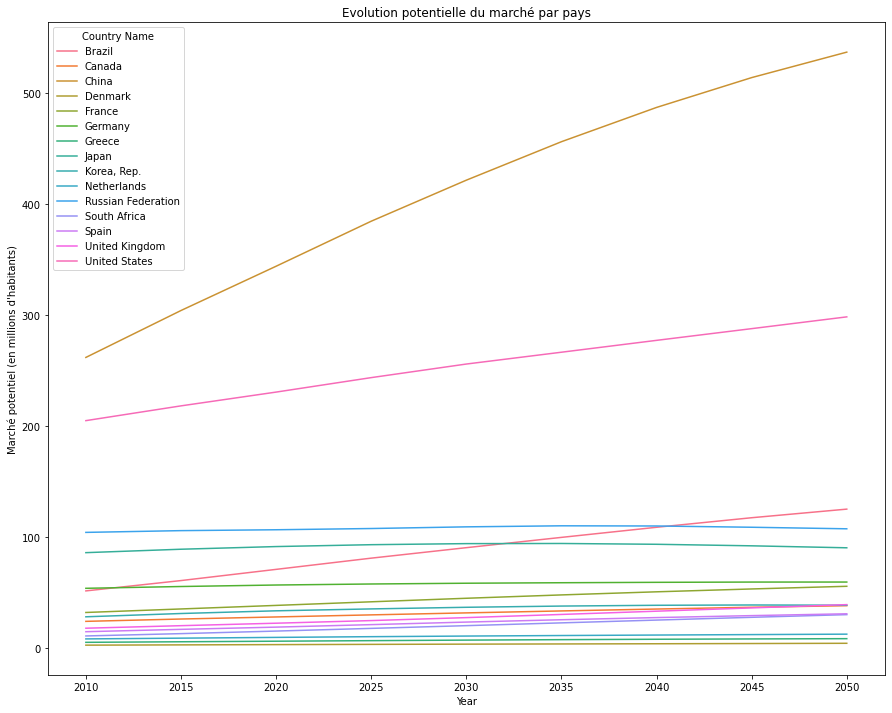

In [514]:
plt.figure(figsize = (15,12))
g=sns.lineplot(data=df_projection, x='Year', y='Wittgenstein Projection: Population in million by highest level of educational attainment. Upper Secondary + Post Secondary. Total'
            , hue='Country Name')
g.set_title('Evolution potentielle du marché par pays')
g.set_ylabel("Marché potentiel (en millions d'habitants)")
plt.show()

In [517]:
df_2010 = df_projection[df_projection['Year']=='2010'].sort_values(by='Wittgenstein Projection: Population in million by highest level of educational attainment. Upper Secondary + Post Secondary. Total', ascending=False)

In [518]:
df_2010.head()

Indicator Name,Country Name,Country Code,Year,Wittgenstein Projection: Population in million by highest level of educational attainment. Upper Secondary + Post Secondary. Total
18,China,CHN,2010,262.20506
126,United States,USA,2010,205.25651
90,Russian Federation,RUS,2010,104.57033
63,Japan,JPN,2010,86.31555
45,Germany,DEU,2010,54.19502


In [519]:
df_2050 = df_projection[df_projection['Year']=='2050'].sort_values(by='Wittgenstein Projection: Population in million by highest level of educational attainment. Upper Secondary + Post Secondary. Total', ascending=False)

In [520]:
df_2050.head()

Indicator Name,Country Name,Country Code,Year,Wittgenstein Projection: Population in million by highest level of educational attainment. Upper Secondary + Post Secondary. Total
26,China,CHN,2050,537.26351
134,United States,USA,2050,298.74643
8,Brazil,BRA,2050,125.52638
98,Russian Federation,RUS,2050,107.80402
71,Japan,JPN,2050,90.69269


In [557]:
df_2010_2050=pd.merge(df_2010,df_2050, how='outer')

In [558]:
df_2010_2050

Indicator Name,Country Name,Country Code,Year,Wittgenstein Projection: Population in million by highest level of educational attainment. Upper Secondary + Post Secondary. Total
0,China,CHN,2010,262.20506
1,United States,USA,2010,205.25651
2,Russian Federation,RUS,2010,104.57033
3,Japan,JPN,2010,86.31555
4,Germany,DEU,2010,54.19502
5,Brazil,BRA,2010,51.85411
6,France,FRA,2010,32.41720
7,"Korea, Rep.",KOR,2010,28.52371
8,Canada,CAN,2010,24.41491
9,United Kingdom,GBR,2010,18.23997


In [559]:
df_2010_2050 = pd.pivot_table(df_2010_2050, index=['Country Name', 'Country Code'], columns='Year', values='Wittgenstein Projection: Population in million by highest level of educational attainment. Upper Secondary + Post Secondary. Total')

In [560]:
df_2010_2050.head()

,Year,2010,2050
Country Name,Country Code,,
Brazil,BRA,51.85411,125.52638
Canada,CAN,24.41491,38.53910
China,CHN,262.20506,537.26351
Denmark,DNK,2.97860,4.65081
France,FRA,32.41720,56.00445


In [561]:
df_2010_2050['Evolution 2050 vs 2010 (en million)']=df_2010_2050['2050']-df_2010_2050['2010']

In [562]:
df_2010_2050['Evolution 2050 vs 2010 (en %)']=((df_2010_2050['2050']/df_2010_2050['2010'])-1)*100

In [563]:
df_2010_2050.head()

,Year,2010,2050,Evolution 2050 vs 2010 (en million),Evolution 2050 vs 2010 (en %)
Country Name,Country Code,,,,
Brazil,BRA,51.85411,125.52638,73.67227,142.076048
Canada,CAN,24.41491,38.53910,14.12419,57.850674
China,CHN,262.20506,537.26351,275.05845,104.902037
Denmark,DNK,2.97860,4.65081,1.67221,56.140804
France,FRA,32.41720,56.00445,23.58725,72.761528


In [564]:
df_2010_2050.reset_index(inplace=True)

In [565]:
pd.set_option('display.float_format',  '{:,.1f}'.format)

df_2010_2050.loc[:,['Country Name', '2010', '2050', 'Evolution 2050 vs 2010 (en million)', 'Evolution 2050 vs 2010 (en %)']].sort_values(by='2010', ascending=False)

Year,Country Name,2010,2050,Evolution 2050 vs 2010 (en million),Evolution 2050 vs 2010 (en %)
2,China,262.2,537.3,275.1,104.9
14,United States,205.3,298.7,93.5,45.5
10,Russian Federation,104.6,107.8,3.2,3.1
7,Japan,86.3,90.7,4.4,5.1
5,Germany,54.2,59.8,5.6,10.4
0,Brazil,51.9,125.5,73.7,142.1
4,France,32.4,56.0,23.6,72.8
8,"Korea, Rep.",28.5,39.0,10.4,36.6
1,Canada,24.4,38.5,14.1,57.9
13,United Kingdom,18.2,39.5,21.3,116.5


In [566]:
pd.reset_option('display.float_format')